### Experiment 1
# Boosting Algorithms vs Random Forest using Elliptic Dataset
<hr>

### Table of Contents
- [Benchmark Model - Random Forest](#benchmark) <br>
&emsp;- [Evaluation Metrics](#benchmark_eval) <br>
&emsp;&emsp;- [Evaluation Metrics Statistics](#benchmark_eval_stats) <br>
&emsp;- [Confusion Matrices](#benchmark_confusion) <br>
&emsp;- [Time Indexed Results (F1)](#benchmark_time) <br>
&emsp;- [Feature Importance](#benchmark_importance) <br>
&emsp;- [Model Parameters](#benchmark_params) <br>
- [Boosting Models - Default Parameters](#defaults) <br>
&emsp;- [Evaluation Metrics](#defaults_eval) <br>
&emsp;- [Confusion Matrices](#defaults_confusion) <br>
&emsp;- [Time Indexed Results (F1)](#defaults_time) <br>
&emsp;- [Feature Importance](#defaults_importance) <br>
&emsp;- [Model Parameters](#defaults_params) <br>
- [Boosting Models - Tuned Parameters](#tuned) <br>
&emsp;- [Evaluation Metrics](#tuned_eval) <br>
&emsp;- [Confusion Matrices](#tuned_confusion) <br>
&emsp;- [Time Indexed Results (F1)](#tuned_time) <br>
&emsp;- [Feature Importance](#tuned_importance) <br>
&emsp;- [Hyperparameter Tuning Studies](#tuned_tuning) <br>
&emsp;- [Model Parameters](#tuned_params) <br>
- [Statistical Analysis](#stats) <br>
- [References](#references)

In [1]:
###### importing dependencies #############################################
import matplotlib.pyplot as plt
from cryptoaml.utils import read_pickle
from IPython.core.display import display, HTML
from cryptoaml.metrics import (
    results_table, 
    plot_metric_dist,
    plot_feature_imp,
    print_model_params, 
    plot_result_matrices,
    display_metrics_stats,
    elliptic_time_indexed_results
)

###### constants ##########################################################
N_features          = 15 # for feature importance N top/bottom
EXP_RESULT_PATH     = "persistence/experiment_1/results"
BENCHMARK_RESULTS   = "{}/{}".format(EXP_RESULT_PATH, "benchmark_model_results.pkl")
DEFAULT_RESULTS     = "{}/{}".format(EXP_RESULT_PATH, "defaults_models_results.pkl")
TUNED_RESULTS       = "{}/{}".format(EXP_RESULT_PATH, "tuned_models_results.pkl")

<a id='benchmark'></a>
## Benchmark Model 

Experiment performed on the [elliptic dataset](https://www.kaggle.com/ellipticco/elliptic-data-set) [1,2]

Models were tested on the following feature sets:
- Local Features (LF)
- Local Features and Node Embeddings extracted from GCN (LF_NE) 
- All Features - Aggregated Features and Local Features (AF)
- All Features and Node Embeddings extracted from GCN (AF_NE) 

__Results obtained in the original paper [2]__

<table style="border-collapse:collapse;border-spacing:0;border-color:#ccc" class="tg"><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#f0f0f0;text-align:center;vertical-align:top" rowspan="2"><br><br>Method<br></th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#f0f0f0;text-align:center;vertical-align:top" colspan="3">Illicit</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#f0f0f0;text-align:center;vertical-align:top">MicroAVG</th></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">Precision</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">Recall</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">F1</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">F1</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(AF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.404</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.593</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.481</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.931</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(AF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.537</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.528</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.533</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.945</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(LF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.348</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.668</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.457</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.920</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(LF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.518</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.571</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.543</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.945</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(AF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.956</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.670</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.788</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.977</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(AF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.971</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.675</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.796</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.978</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(LF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.803</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.611</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.694</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.966</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(LF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.874</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.668</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.759</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.973</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP (<span style="font-style:italic">AF</span>)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.694</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.617</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.653</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.962</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP <span style="font-style:italic">(AF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.780</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.617</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.689</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.967</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP <span style="font-style:italic">(LF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.637</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.662</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.649</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.958</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP <span style="font-style:italic">(LF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.6819</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.5782</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.6258</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.986</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">GCN</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.812</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.512</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.628</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.961</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">Skip-GCN</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.812</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.623</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.705</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.966</td></tr></table>

<img width="100%" src="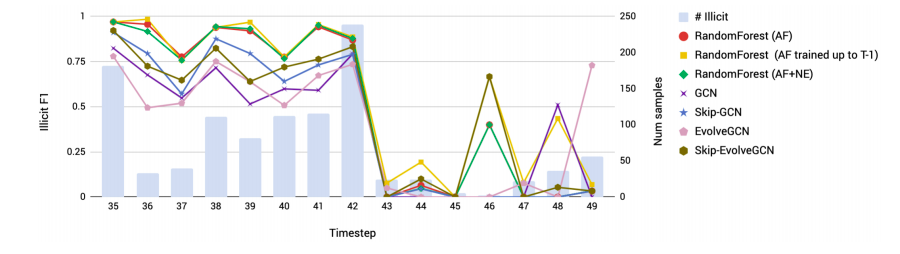
">

<small>
    <i>
   Illicit F1 results over test time span from benchmark paper [2].
    </i>
</small>

In [2]:
# load results for benchmark model
benchmark_model = "random_forest"
benchmark_results = read_pickle(BENCHMARK_RESULTS)

<a id='benchmark_eval'></a>
### Evaluation Metrics (Benchmark)

- <i>Precision</i> 
- <i>Recall</i> 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- AUC
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper. The results reproduce are very close to the ones documented in the benchmark paper [2], shown in the previous section. In our test run we managed to obtain higher results using the same parameters specified.
    </i>
</small>

In [3]:
# dataframe with all the perfomance metrics
print("Performance metrics for benchmark model")
benchmark_metrics_df = results_table(benchmark_results)
display(benchmark_metrics_df)

# sorted by f1 score
print("Performance metrics for benchmark model sorted by f1-score")
display(benchmark_metrics_df.sort_values("f1", ascending=False))

Performance metrics for benchmark model


,model,precision,recall,f1_micro,accuracy,auc,f1
0,random_forest_LF,0.868,0.688,0.973,0.973,0.841,0.768
1,random_forest_LF_NE,0.956,0.697,0.978,0.978,0.847,0.806
2,random_forest_AF,0.897,0.721,0.977,0.977,0.858,0.800
3,random_forest_AF_NE,0.958,0.715,0.979,0.979,0.857,0.819


Performance metrics for benchmark model sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
3,random_forest_AF_NE,0.958,0.715,0.979,0.979,0.857,0.819
1,random_forest_LF_NE,0.956,0.697,0.978,0.978,0.847,0.806
2,random_forest_AF,0.897,0.721,0.977,0.977,0.858,0.800
0,random_forest_LF,0.868,0.688,0.973,0.973,0.841,0.768


<a id='benchmark_eval_stats'></a>
#### Evaluation Statistics (Benchmark)

<i>Note: Since random forest is non-deterministic in nature, we ran the model for 100 iterations and averaged the results. This was done to insure robustness and was also recommended in previous studies.<i/>
    
Below we show statistics for the evaluation metrics.

'random_forest' on 'LF' feature set - performance metrics stats


,iteration,precision,recall,f1_micro,accuracy,auc,f1
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.868189,0.688319,0.972941,0.972941,0.840518,0.767706
std,29.011492,0.013338,0.010523,0.000517,0.000517,0.004890,0.004248
min,0.000000,0.837336,0.668513,0.971266,0.971266,0.831306,0.755238
25%,24.750000,0.858148,0.680517,0.972585,0.972585,0.836881,0.765461
50%,49.500000,0.867902,0.686519,0.972975,0.972975,0.839939,0.767695
75%,74.250000,0.877817,0.696214,0.973365,0.973365,0.844033,0.770368
max,99.000000,0.895191,0.715605,0.973905,0.973905,0.853215,0.777665


'random_forest' on 'LF_NE' feature set - performance metrics stats


,iteration,precision,recall,f1_micro,accuracy,auc,f1
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.955765,0.697054,0.978219,0.978219,0.847405,0.806136
std,29.011492,0.006867,0.003770,0.000250,0.000250,0.001761,0.001994
min,0.000000,0.937576,0.683287,0.977564,0.977564,0.840938,0.800214
25%,24.750000,0.951066,0.695060,0.978044,0.978044,0.846391,0.805056
50%,49.500000,0.955235,0.696214,0.978224,0.978224,0.847161,0.806383
75%,74.250000,0.959313,0.699215,0.978404,0.978404,0.848461,0.807533
max,99.000000,0.971539,0.707295,0.978764,0.978764,0.852011,0.809574


'random_forest' on 'AF' feature set - performance metrics stats


,iteration,precision,recall,f1_micro,accuracy,auc,f1
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.897260,0.721090,0.976504,0.976504,0.857670,0.799537
std,29.011492,0.013136,0.002091,0.000755,0.000755,0.000999,0.005063
min,0.000000,0.851249,0.715605,0.973845,0.973845,0.855140,0.782435
25%,24.750000,0.891273,0.719298,0.976170,0.976170,0.857014,0.797292
50%,49.500000,0.899368,0.721145,0.976665,0.976665,0.857727,0.800512
75%,74.250000,0.906141,0.722299,0.976965,0.976965,0.858328,0.802875
max,99.000000,0.918728,0.725762,0.977684,0.977684,0.859898,0.808247


'random_forest' on 'AF_NE' feature set - performance metrics stats


,iteration,precision,recall,f1_micro,accuracy,auc,f1
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.958395,0.715319,0.979485,0.979485,0.856579,0.819186
std,29.011492,0.006378,0.002989,0.000247,0.000247,0.001384,0.001833
min,0.000000,0.940821,0.702678,0.978824,0.978824,0.850761,0.814698
25%,24.750000,0.954601,0.713758,0.979364,0.979364,0.855950,0.817978
50%,49.500000,0.959108,0.715605,0.979544,0.979544,0.856776,0.819353
75%,74.250000,0.962558,0.716759,0.979604,0.979604,0.857383,0.820296
max,99.000000,0.976893,0.722068,0.979964,0.979964,0.859687,0.822906


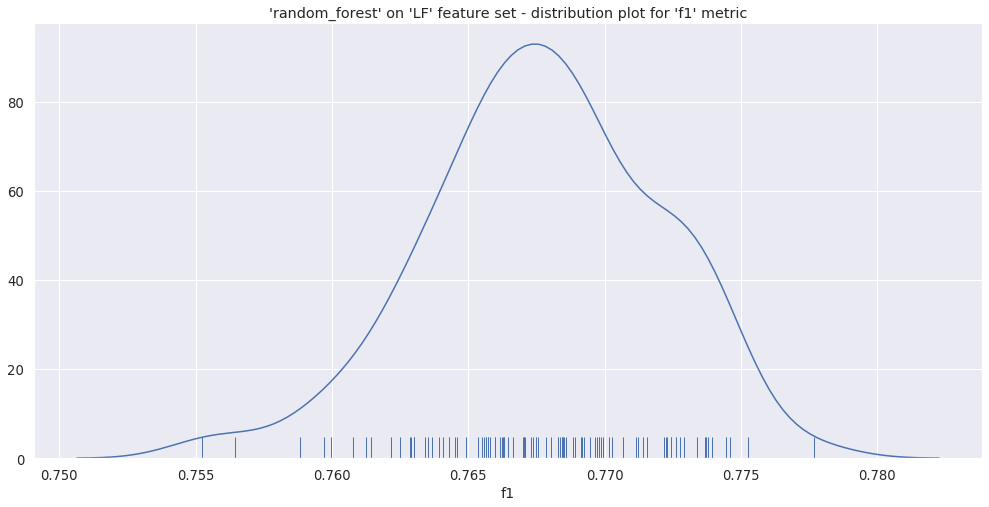

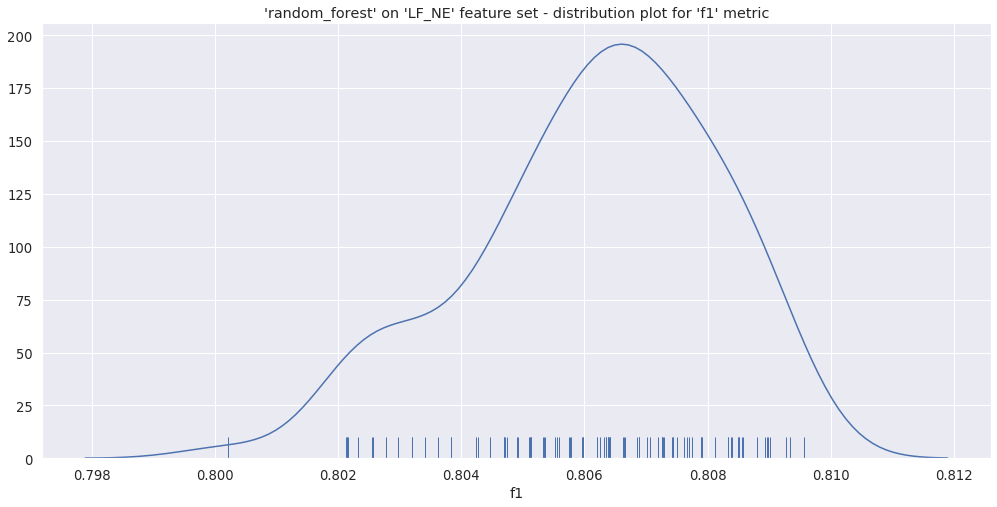

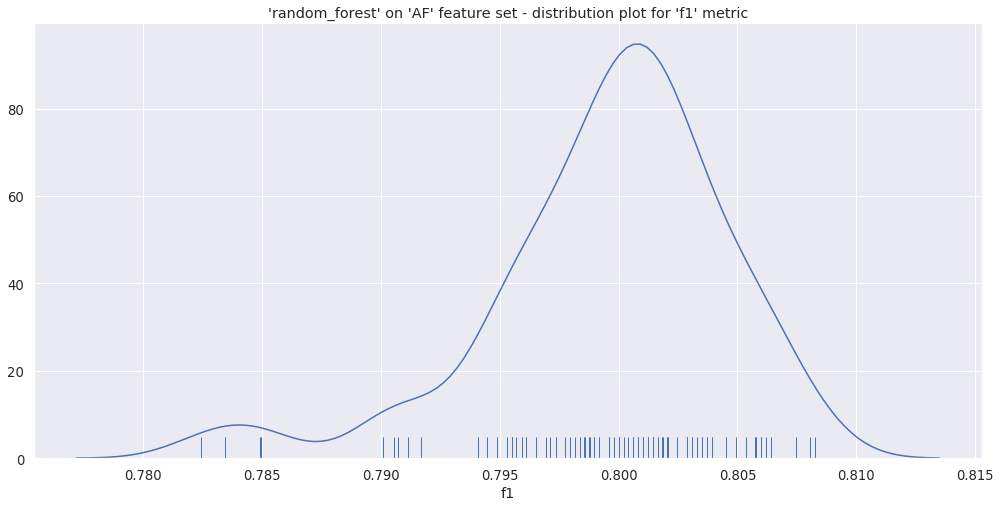

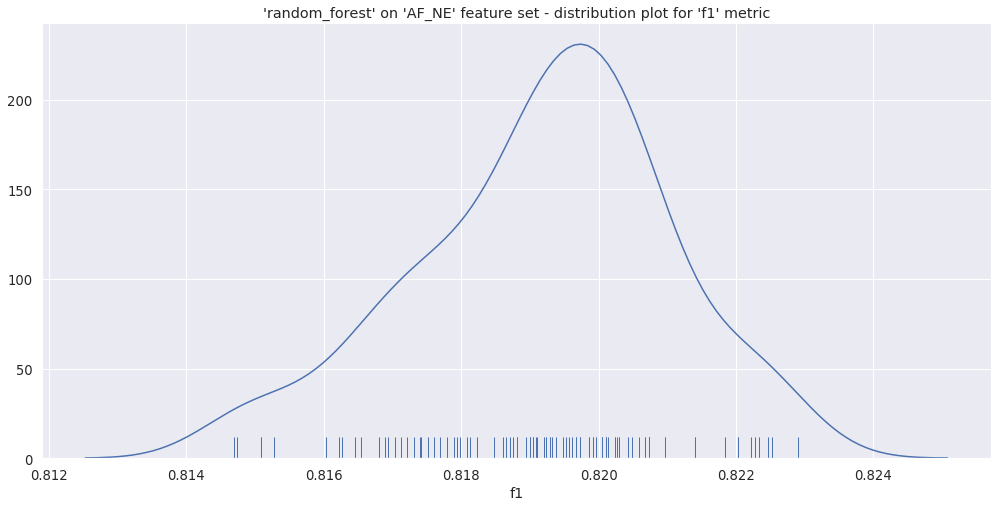

In [4]:
# display stats for each metric for benchmark model over 100 runs
display_metrics_stats(benchmark_results)

# plot f1 score distribution for benchmark model over 100 runs
plot_metric_dist(benchmark_results, "f1", figsize=(17,8))

<a id='benchmark_confusion'></a>
### Confusion Matrices (Benchmark)

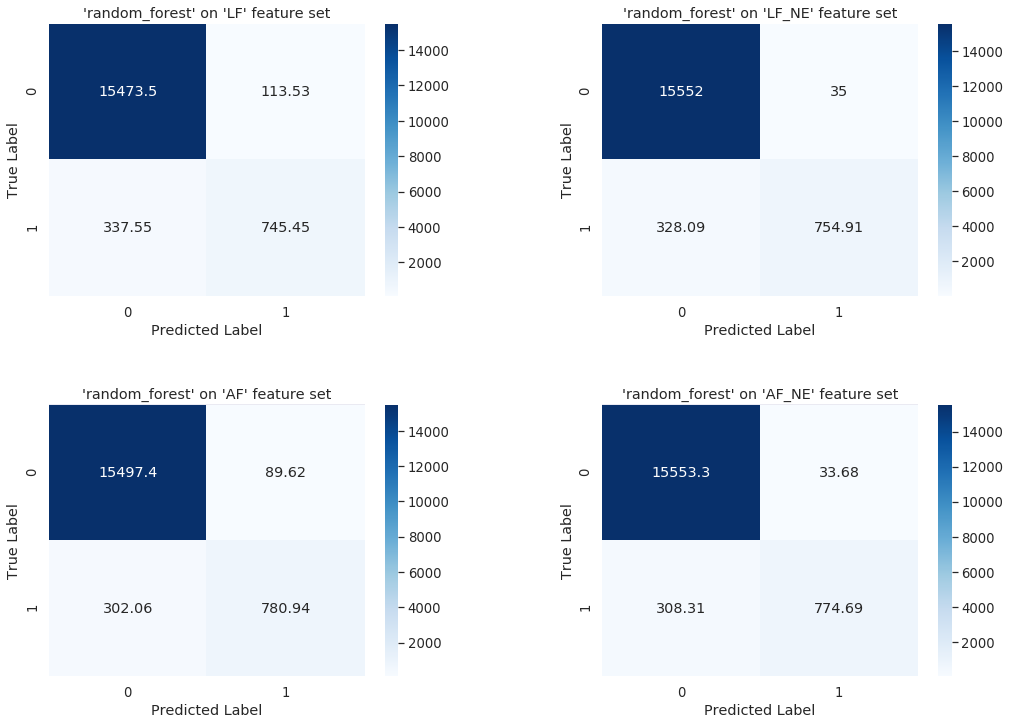

In [5]:
# plot confusion matrices for benchmark model 
plot_result_matrices(benchmark_results, figsize=(17,12))

<a id='benchmark_time'></a>
### F1 Results over Test Time Span (Benchmark)

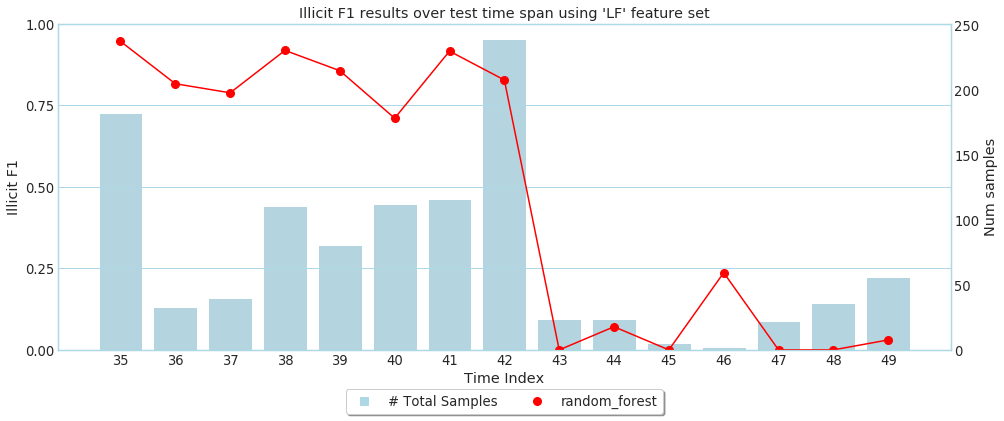

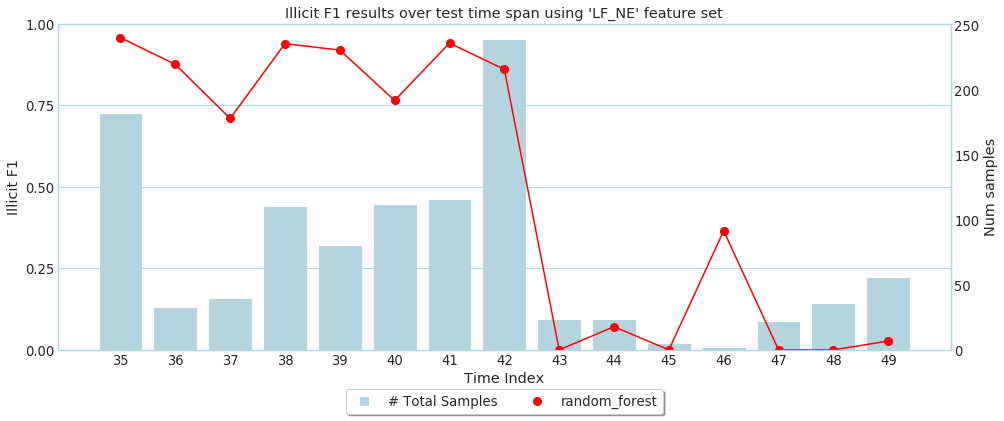

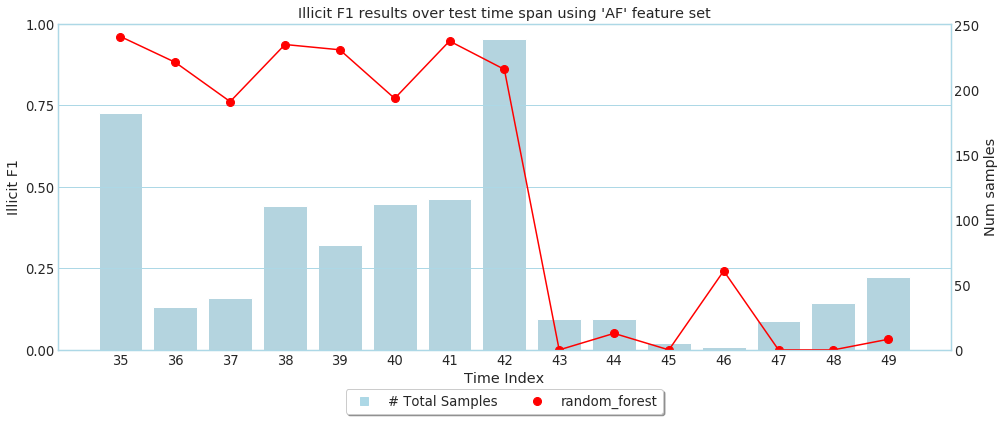

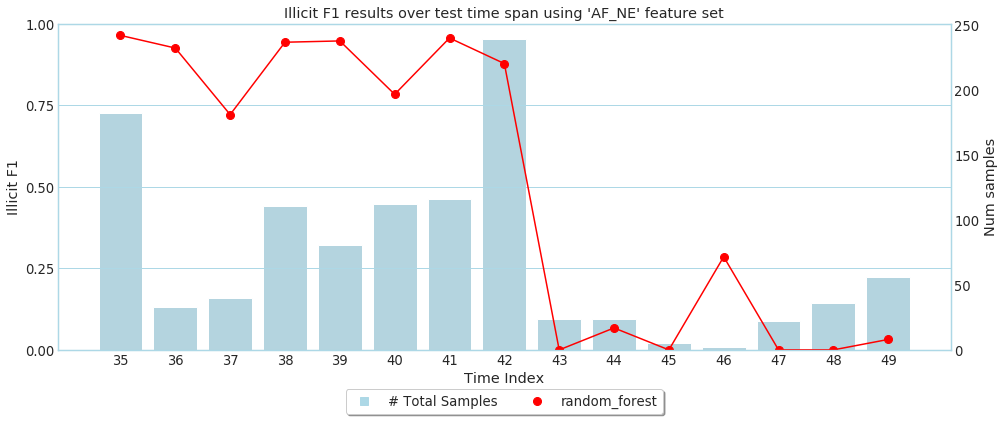

In [6]:
# plot f1 results over test time span, for benchmark model 
elliptic_time_indexed_results(benchmark_results)

<a id='benchmark_importance'></a>
### Feature Importance (Benchmark)

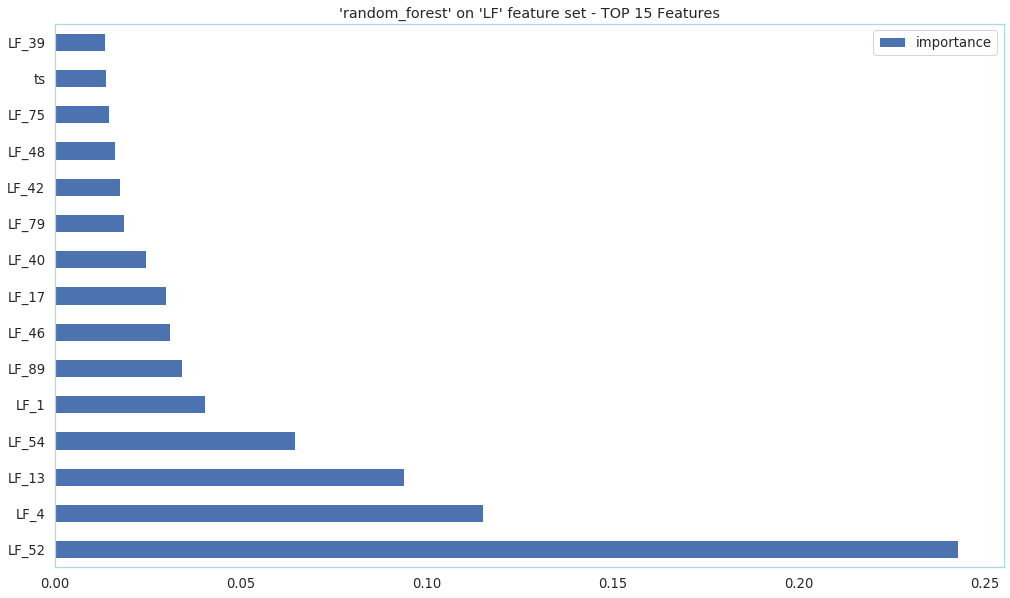

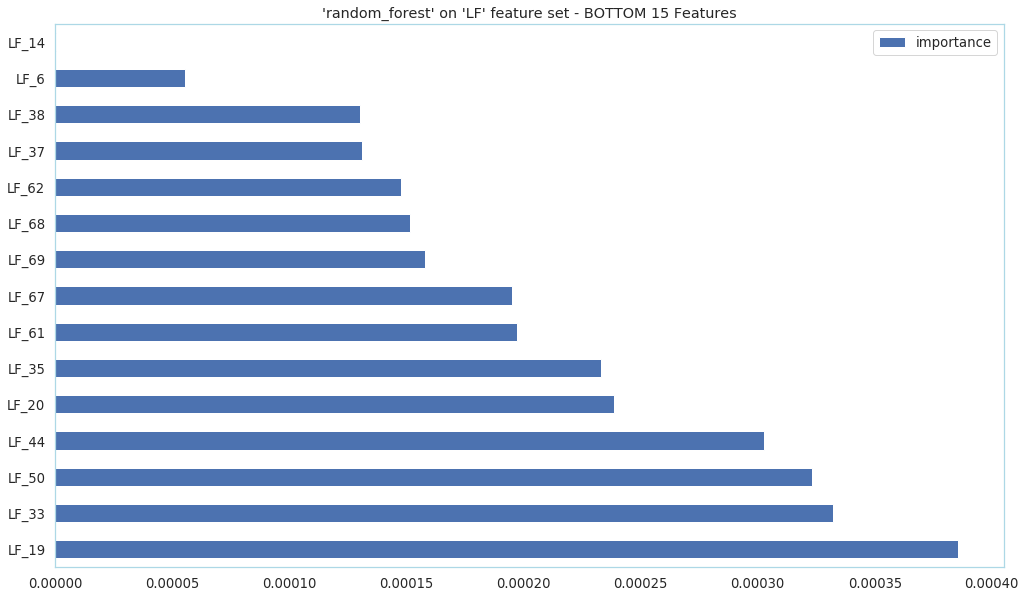

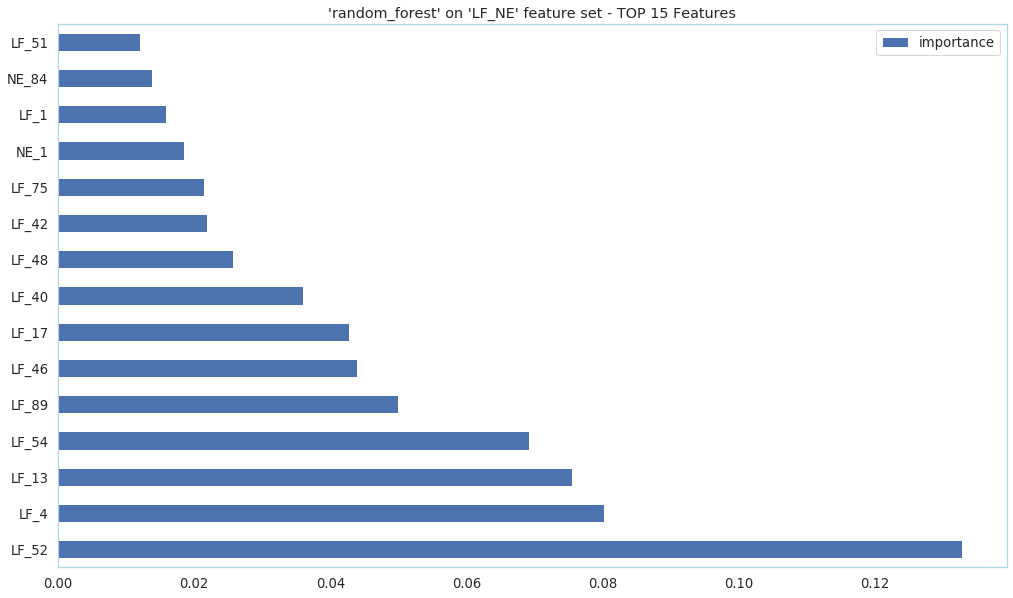

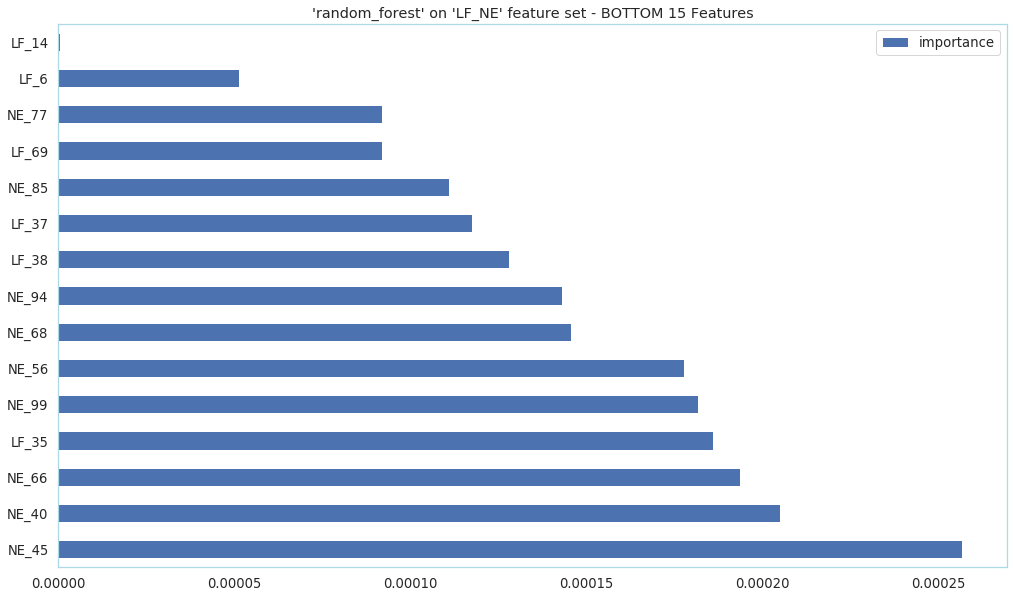

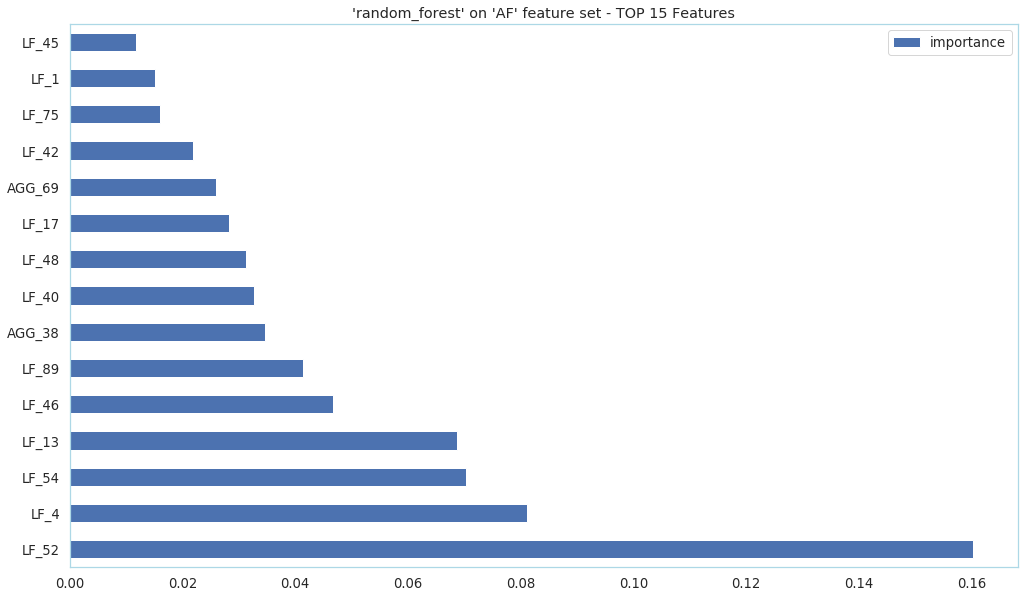

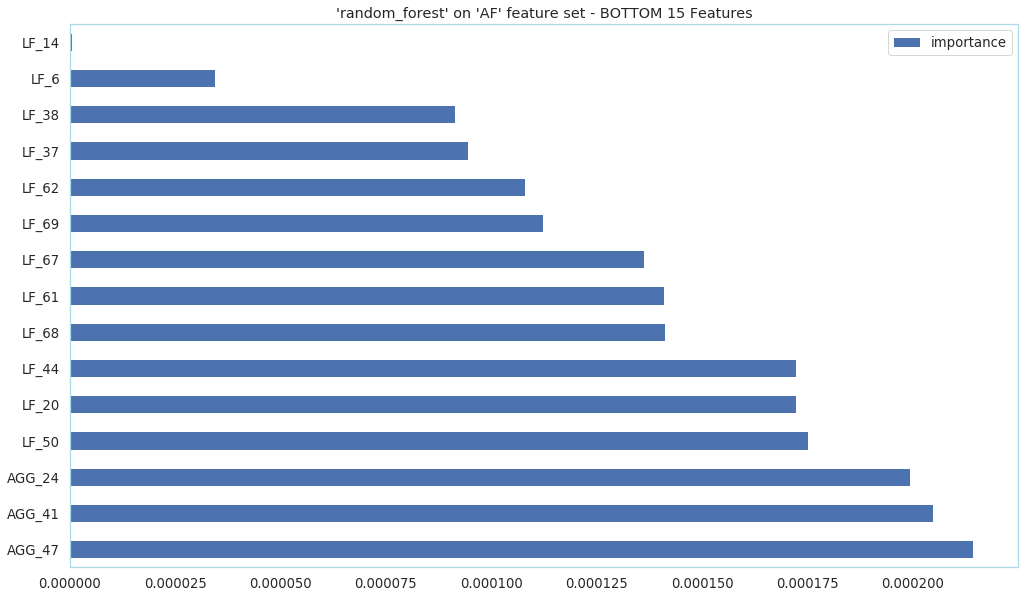

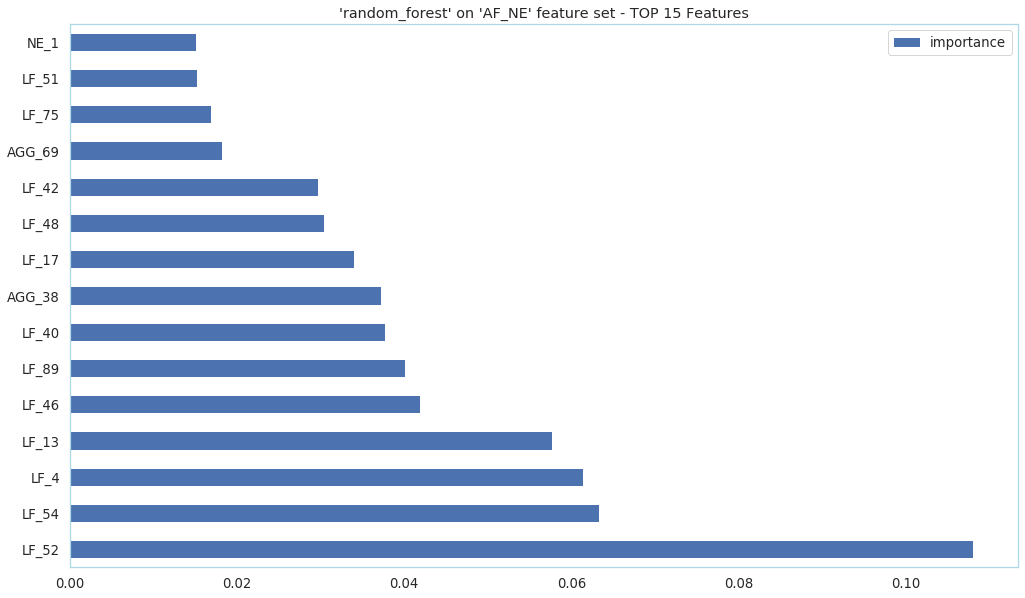

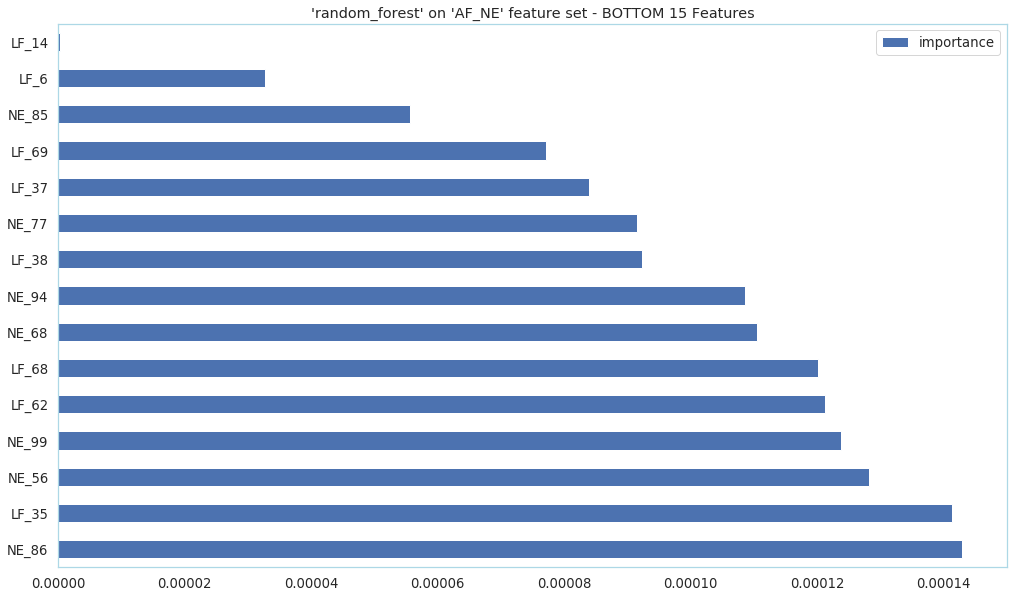

In [7]:
# plot top/bottom N features for benchmark model 
plot_feature_imp(benchmark_results, N_features)

<a id='benchmark_params'></a>
### Model Parameters (Benchmark)
Same parameters utilised on all feature sets.

- n_estimators: 50
- max_features: 50

<small>
    <i>
    As described in the benchmark paper [2].
    </i>
</small>

In [8]:
# print parameters used to train random_forest, all feature sets were trained,
# on the same parameters
print_model_params(benchmark_results)

Parameters used for 'random_forest' on 'LF' feature set
{   'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 50,
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_impurity_split': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 50,
    'n_jobs': -1,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False}


Parameters used for 'random_forest' on 'LF_NE' feature set
{   'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 50,
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_impurity_split': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 50,
    'n_jobs': -1,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False}


Parameters used for 'random_forest' on 'AF' feature set
{   'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 50,
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_impurity_split': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 50,
    'n_jobs': -1,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False}


Parameters used for 'random_forest' on 'AF_NE' feature set
{   'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 50,
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_impurity_split': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 50,
    'n_jobs': -1,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False}


<a id='defaults'></a>
## Default Parameters - Boosting Models
- [XGBoost: eXtreme Gradient Boosting](https://xgboost.readthedocs.io/en/latest/) 
- [LightGBM: Light Gradient Boosting Machine](https://lightgbm.readthedocs.io/en/latest/) 
- [CatBoost](https://catboost.ai/) 

In [9]:
# load results for default models
default_results = read_pickle(DEFAULT_RESULTS)

<a id='defaults_eval'></a>
### Evaluation Metrics (Defaults)
- <i>Precision</i> 
- <i>Recall</i> 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- AUC
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [10]:
# dataframe with all the perfomance metrics
print("Performance metrics for defaults boosting models")
defaults_metrics_df = results_table(default_results)
display(defaults_metrics_df)

# sorted by f1 score
print("Performance metrics for defaults boosting models sorted by f1-score")
display(defaults_metrics_df.sort_values("f1", ascending=False))

Performance metrics for defaults boosting models


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_LF,0.877,0.702,0.974,0.974,0.847,0.779
1,xg_boost_LF_NE,0.988,0.665,0.978,0.978,0.832,0.795
2,xg_boost_AF,0.902,0.723,0.977,0.977,0.859,0.803
3,xg_boost_AF_NE,0.979,0.693,0.979,0.979,0.846,0.812
4,light_boost_LF,0.861,0.711,0.974,0.974,0.852,0.779
5,light_boost_LF_NE,0.977,0.681,0.978,0.978,0.840,0.803
6,light_boost_AF,0.931,0.723,0.979,0.979,0.860,0.814
7,light_boost_AF_NE,0.983,0.689,0.979,0.979,0.844,0.810
8,cat_boost_LF,0.902,0.702,0.976,0.976,0.848,0.789
9,cat_boost_LF_NE,0.975,0.675,0.978,0.978,0.837,0.798


Performance metrics for defaults boosting models sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
10,cat_boost_AF,0.953,0.717,0.979,0.979,0.858,0.819
6,light_boost_AF,0.931,0.723,0.979,0.979,0.860,0.814
11,cat_boost_AF_NE,0.984,0.693,0.979,0.979,0.846,0.813
3,xg_boost_AF_NE,0.979,0.693,0.979,0.979,0.846,0.812
7,light_boost_AF_NE,0.983,0.689,0.979,0.979,0.844,0.810
2,xg_boost_AF,0.902,0.723,0.977,0.977,0.859,0.803
5,light_boost_LF_NE,0.977,0.681,0.978,0.978,0.840,0.803
9,cat_boost_LF_NE,0.975,0.675,0.978,0.978,0.837,0.798
1,xg_boost_LF_NE,0.988,0.665,0.978,0.978,0.832,0.795
8,cat_boost_LF,0.902,0.702,0.976,0.976,0.848,0.789


<a id='defaults_confusion'></a>
### Confusion Matrices (Defaults)

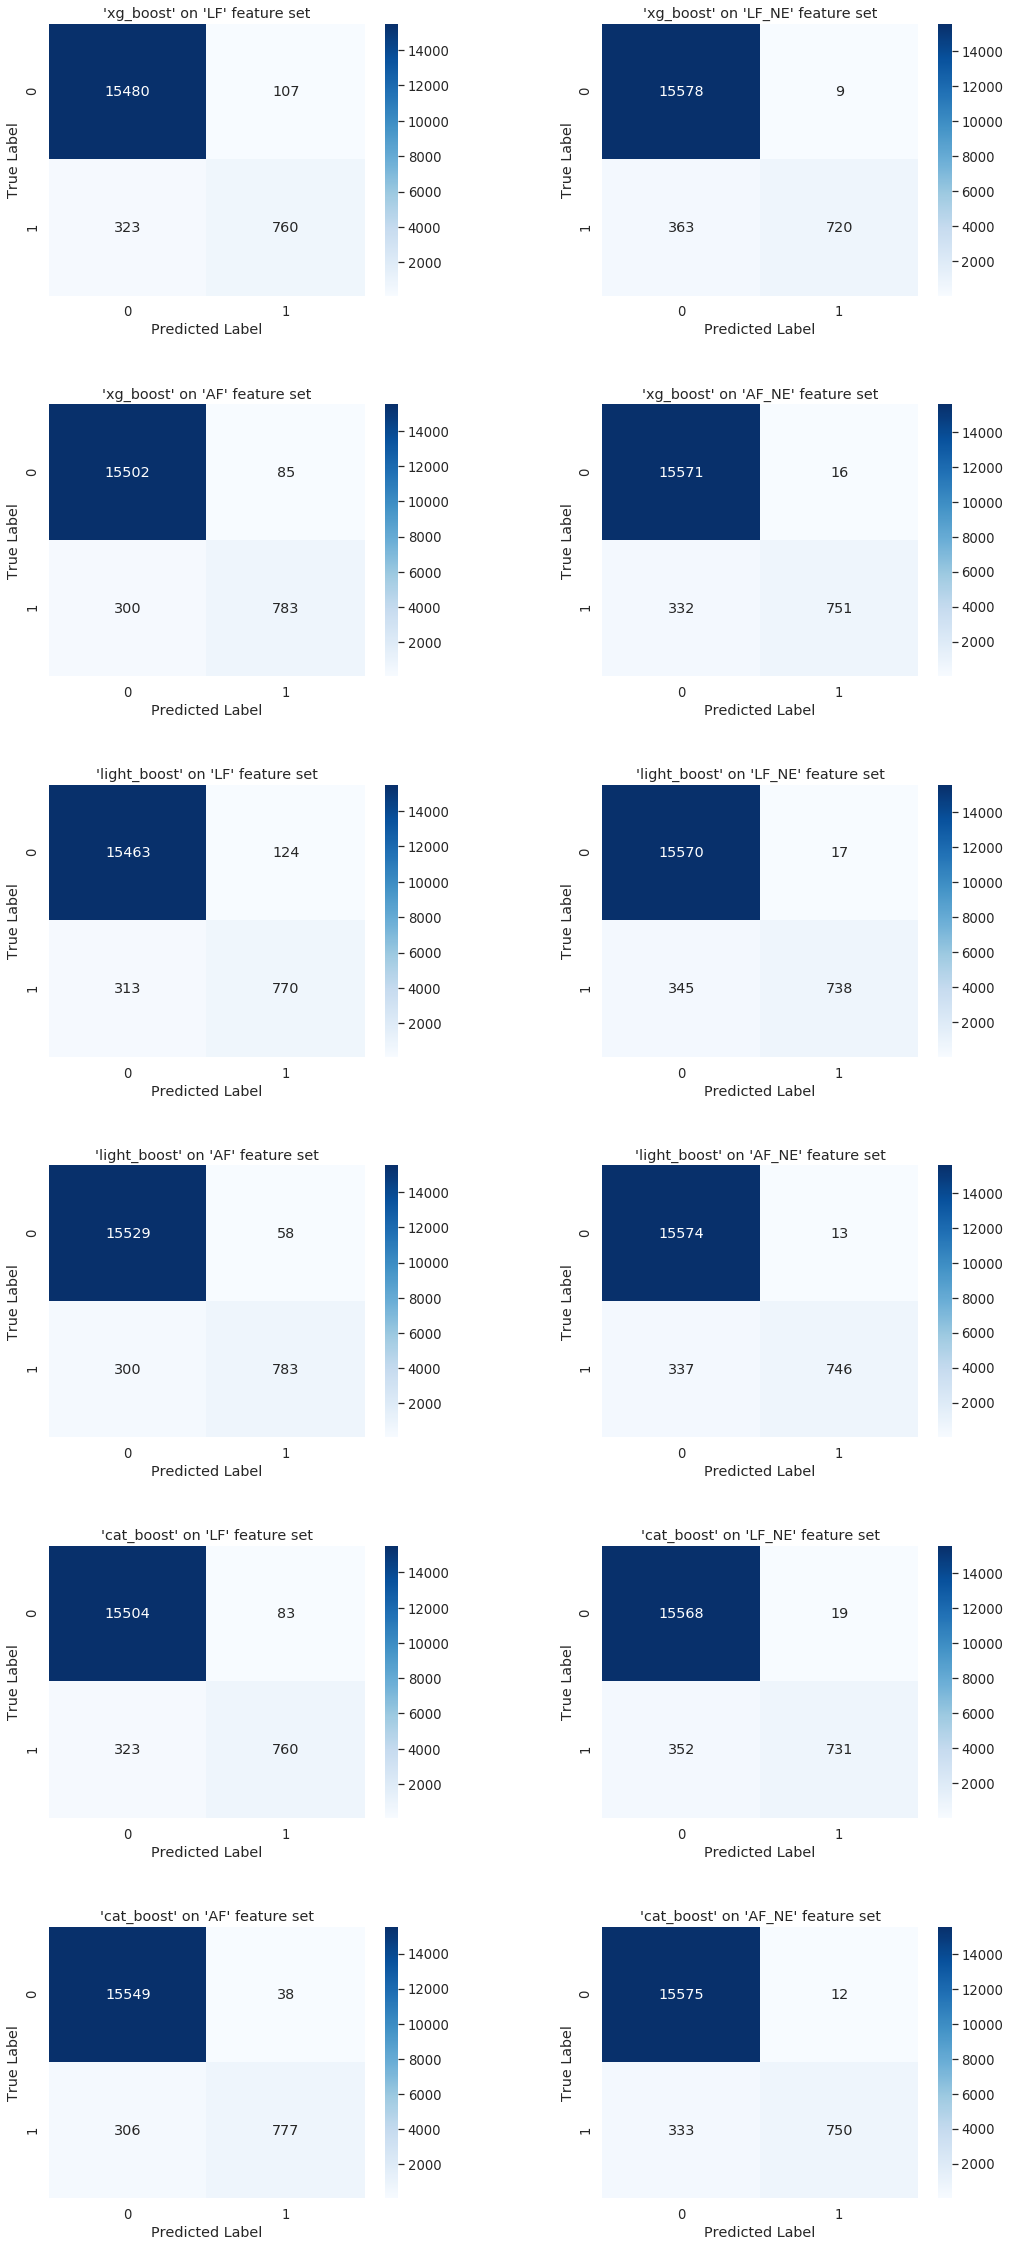

In [11]:
# plot confusion matrices for boosting models with default parameters 
plot_result_matrices(default_results, figsize=(17,40))

<a id='defaults_time'></a>
### F1 Results over Test Time Span (Defaults)

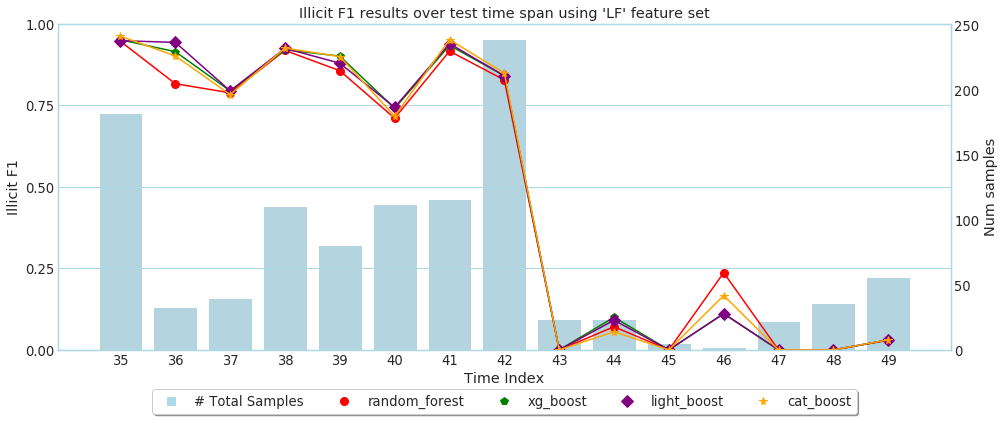

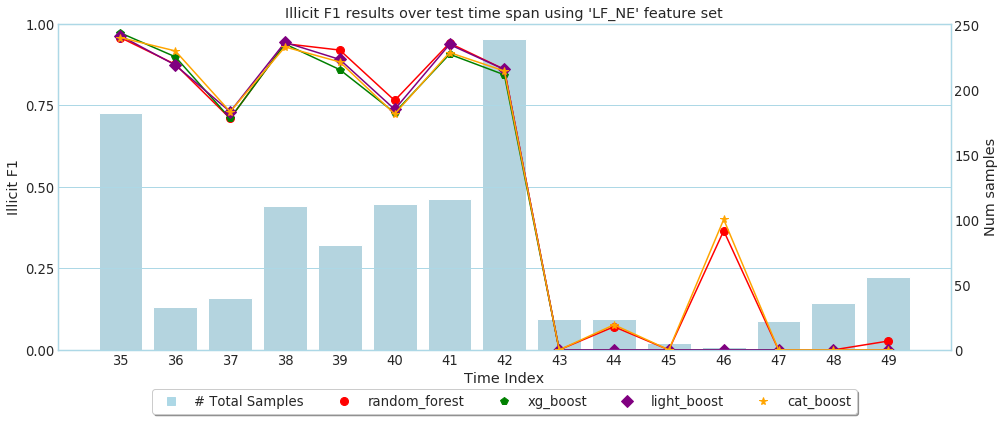

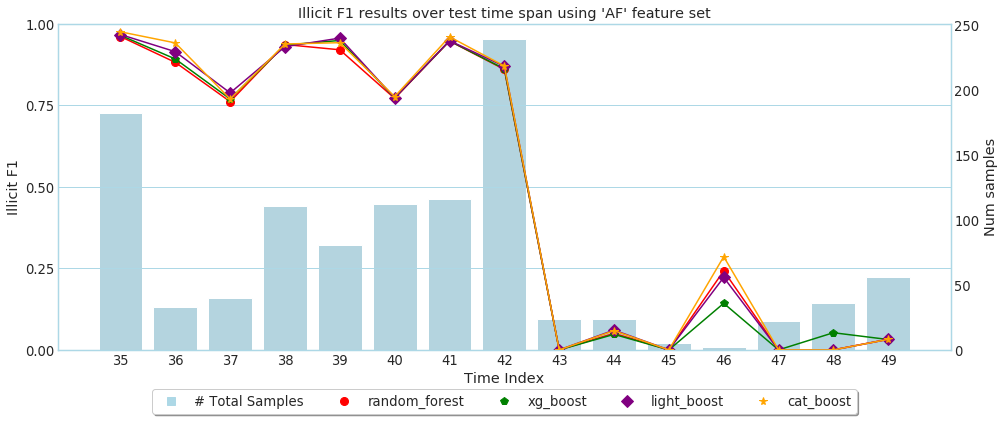

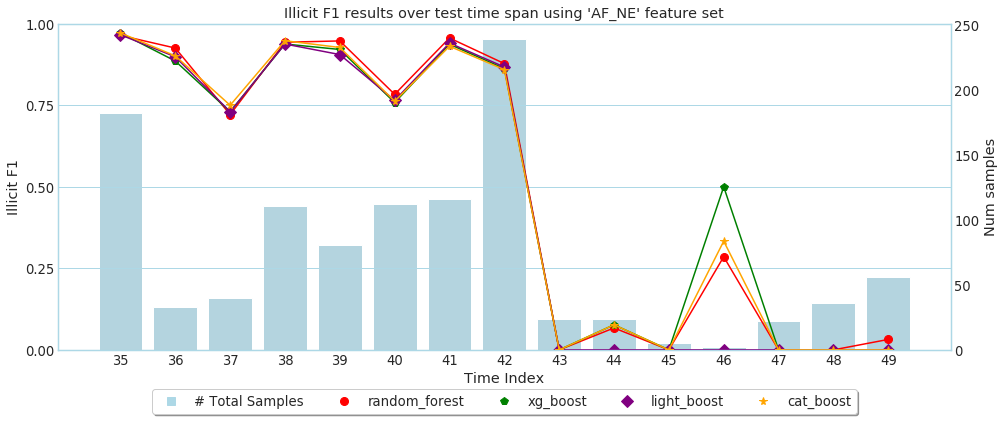

In [12]:
# plot f1 results over test time span, 
# for boosting models with default parameters 

# in this plot we also display benchmark model
tmp_results = {**benchmark_results, **default_results}
elliptic_time_indexed_results(tmp_results)

<a id='defaults_importance'></a>
### Feature Importance (Defaults)

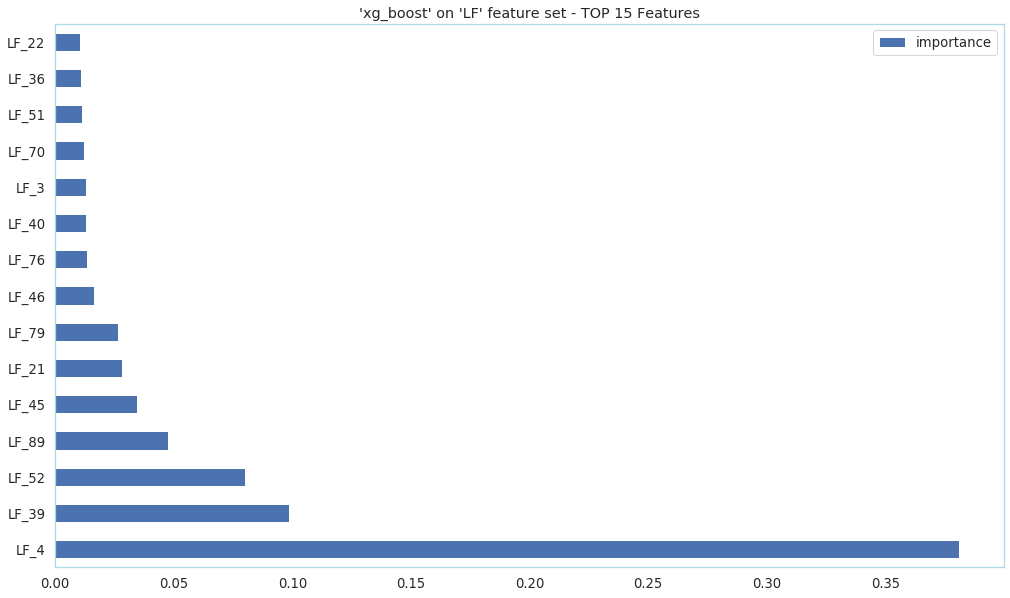

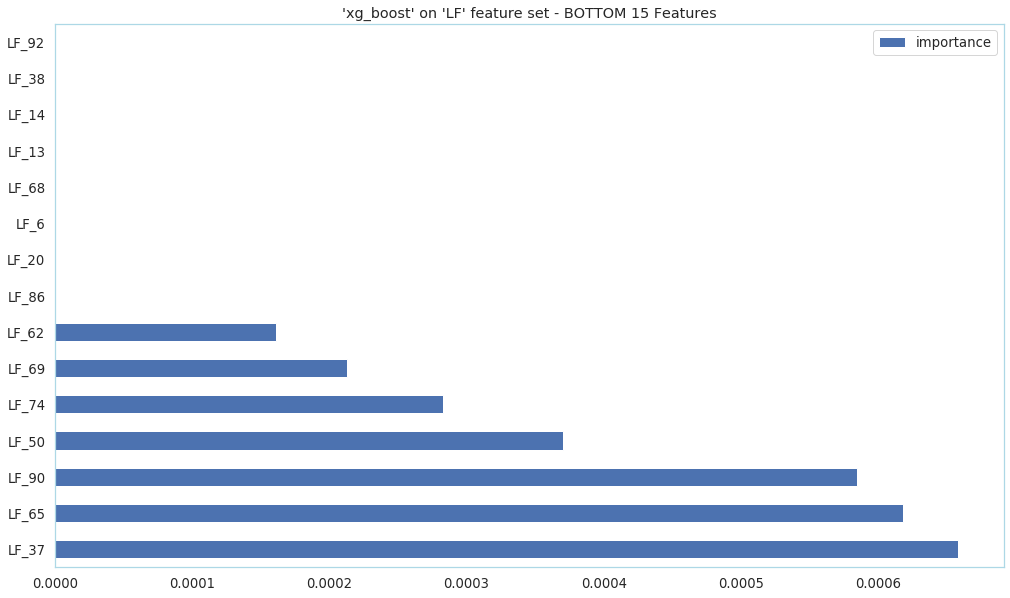

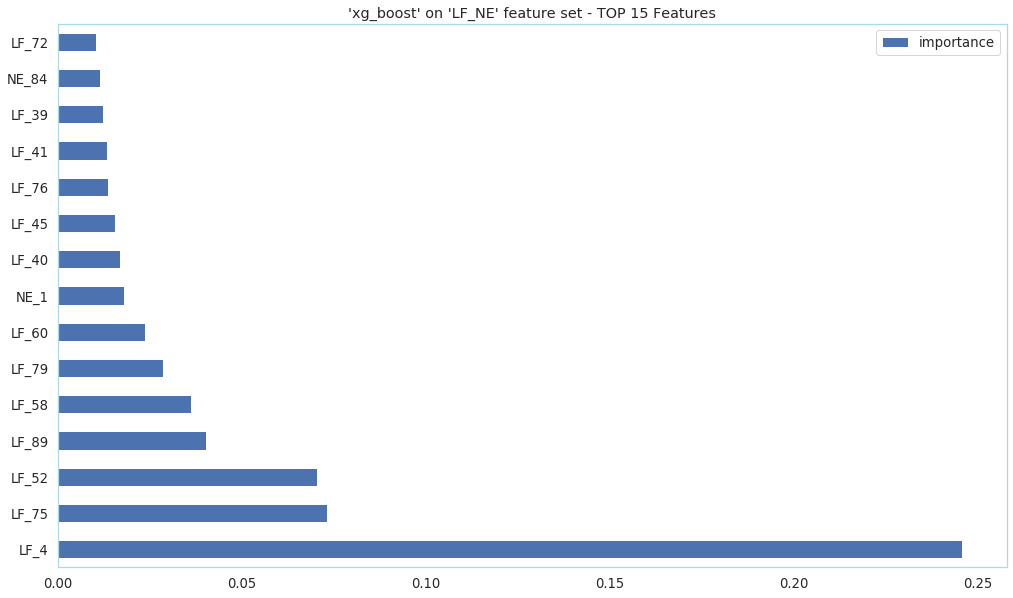

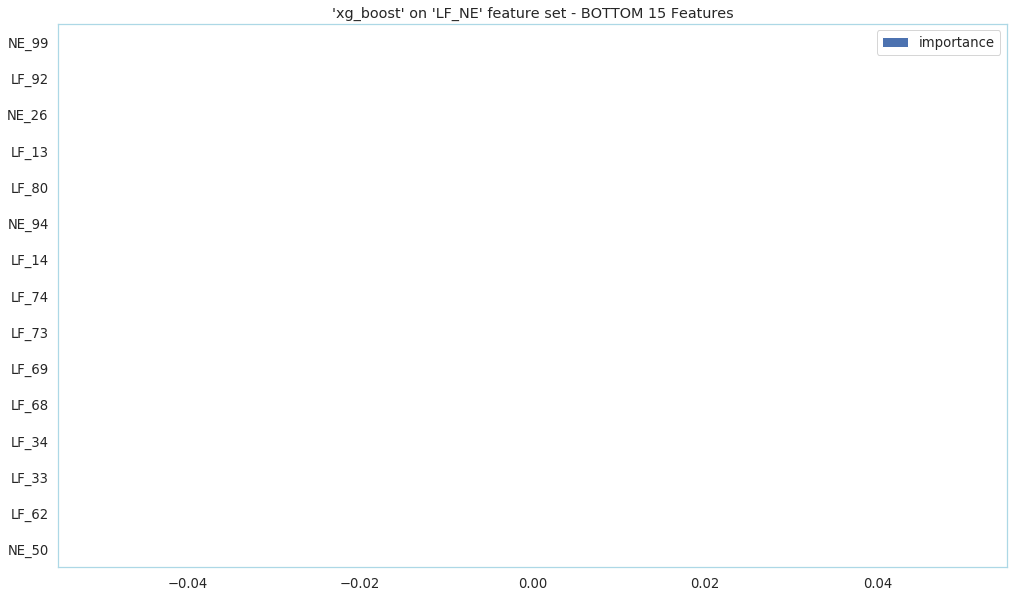

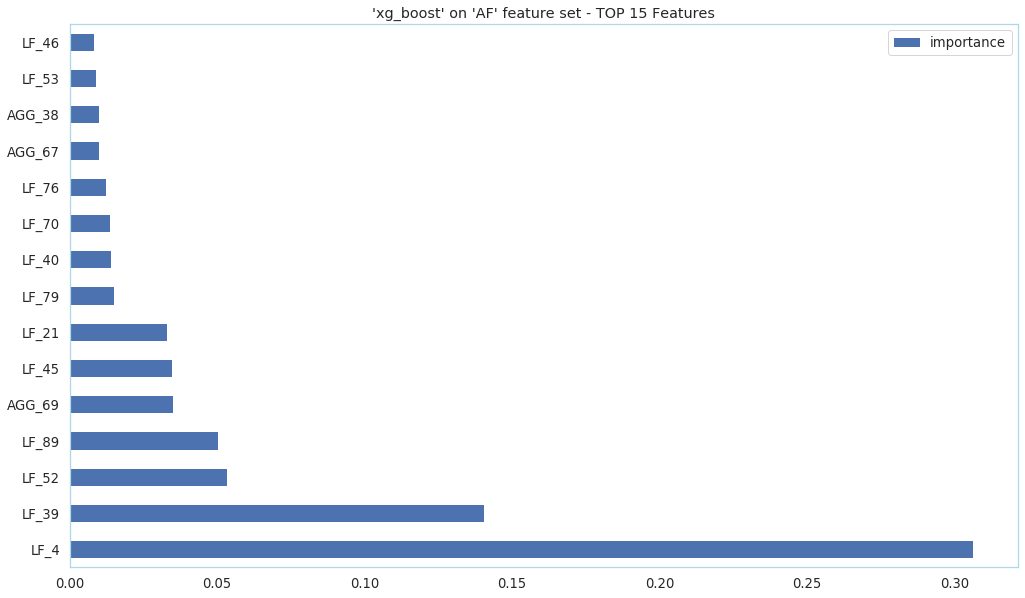

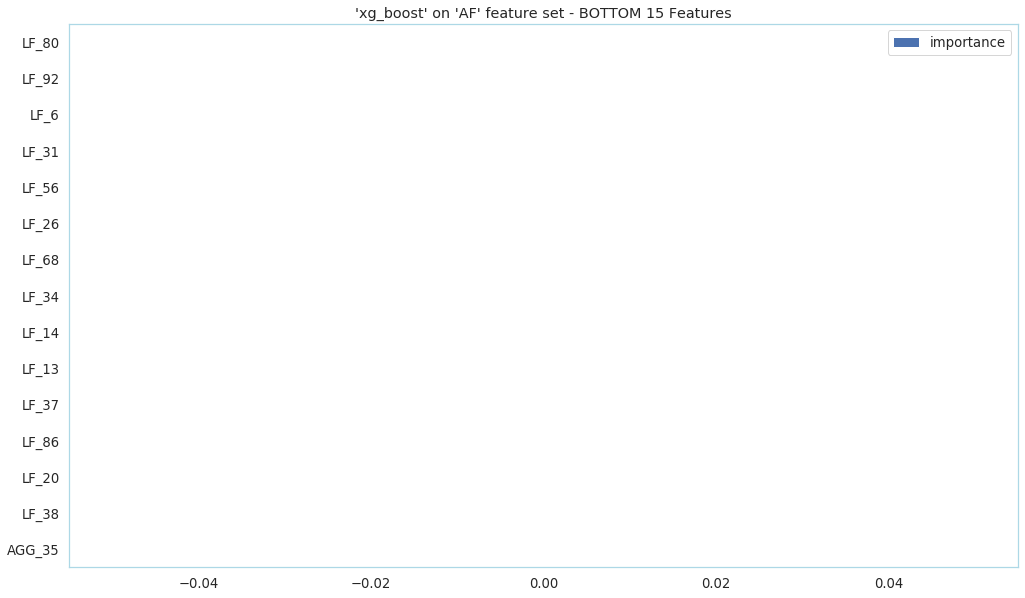

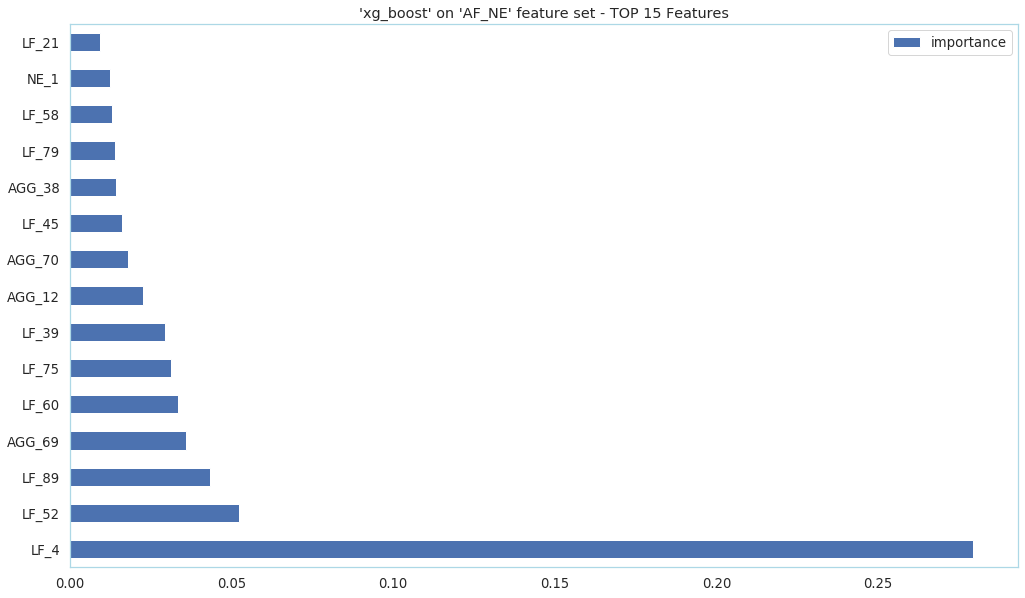

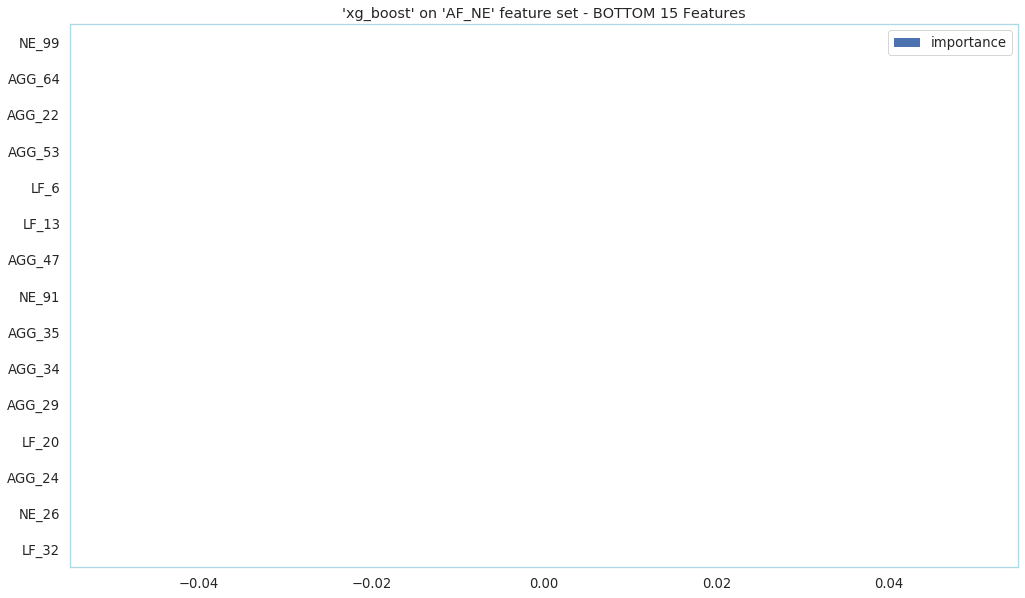

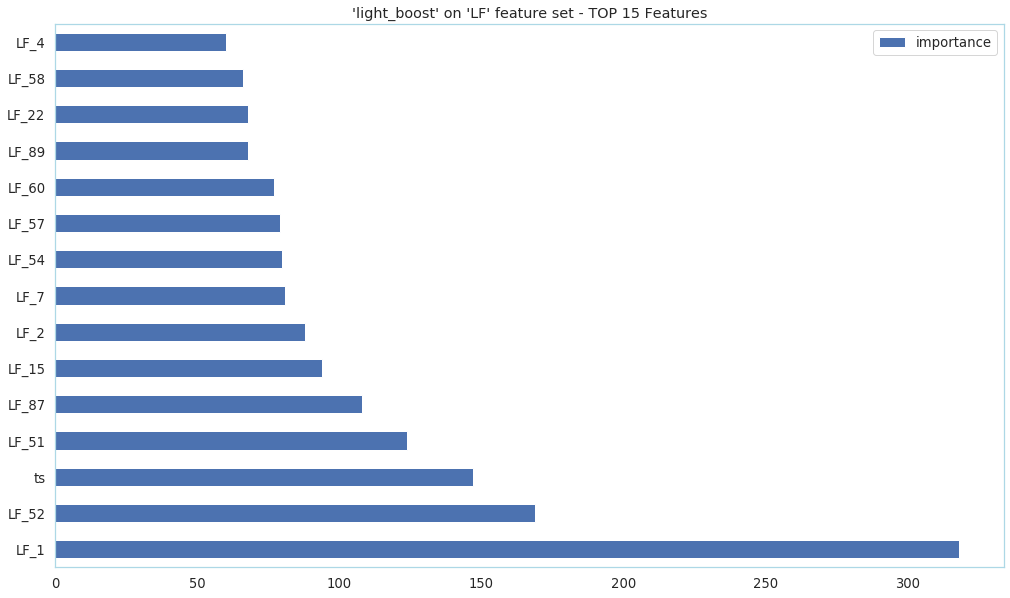

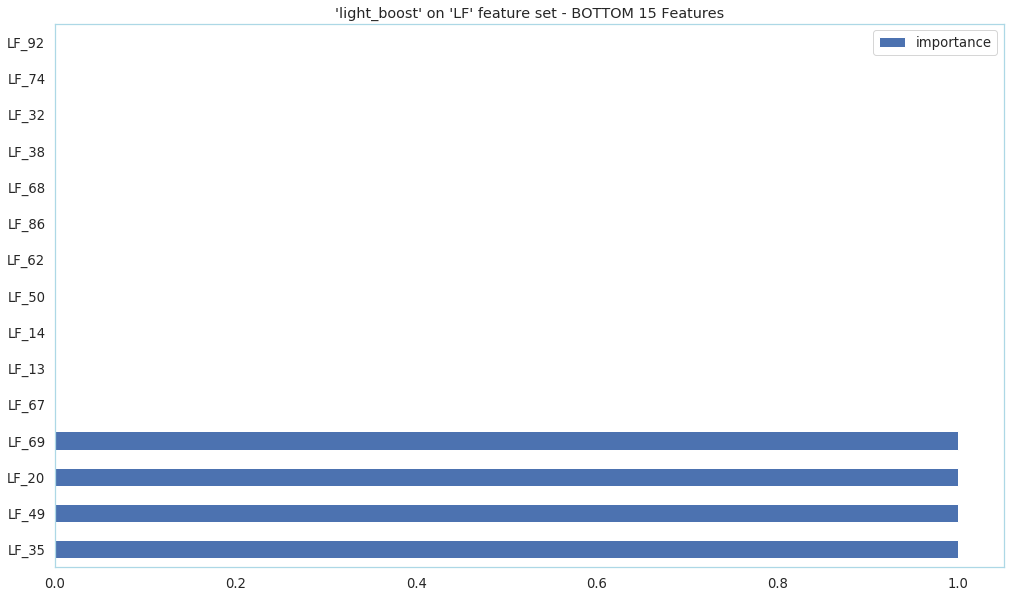

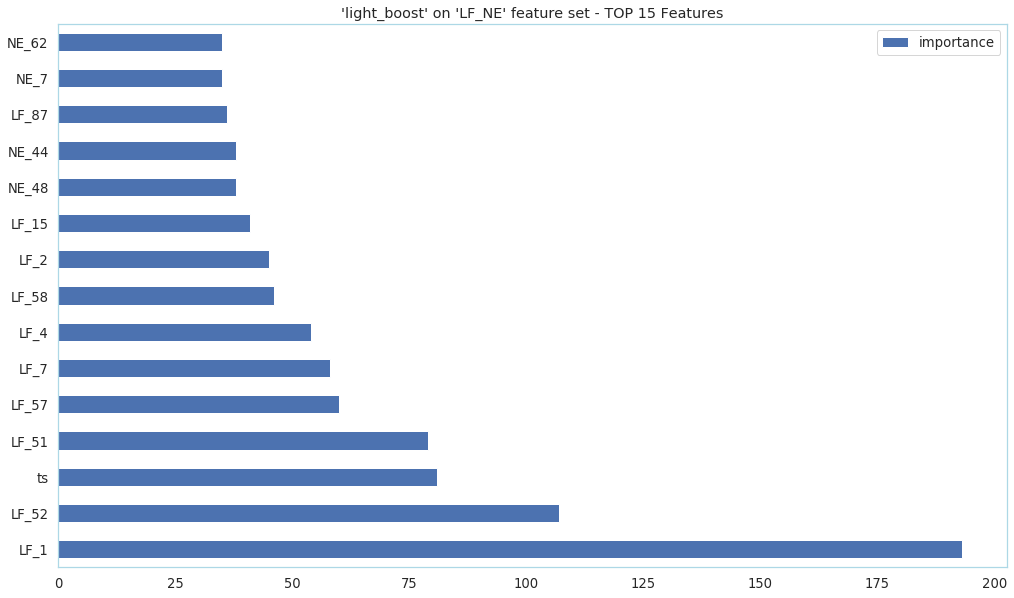

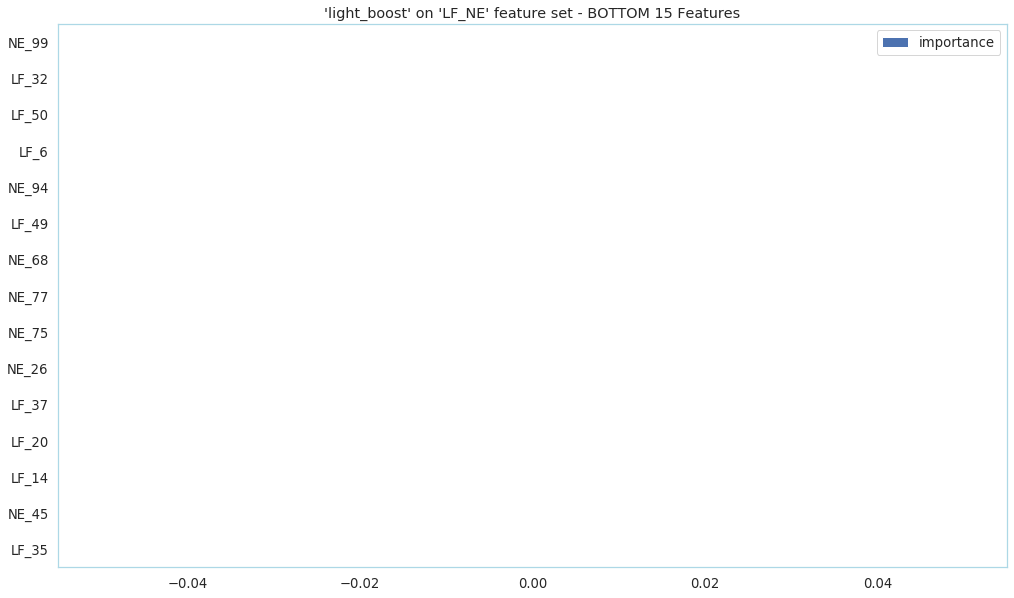

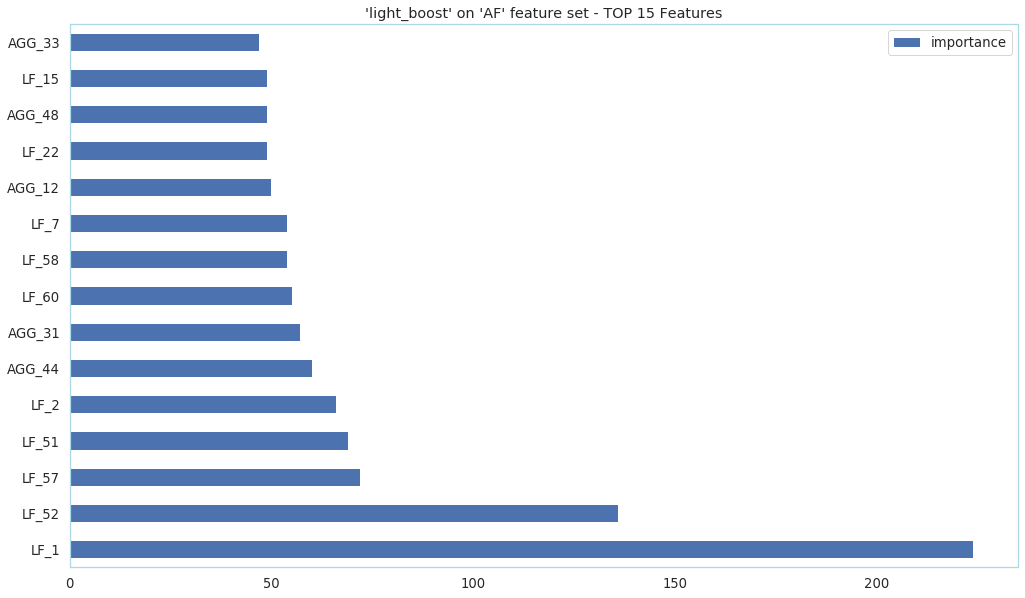

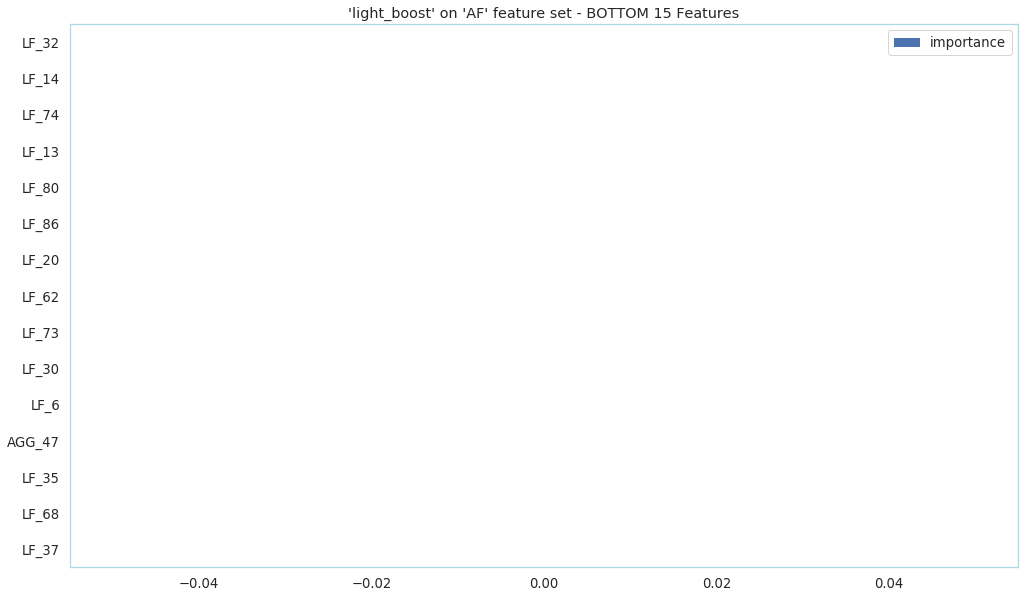

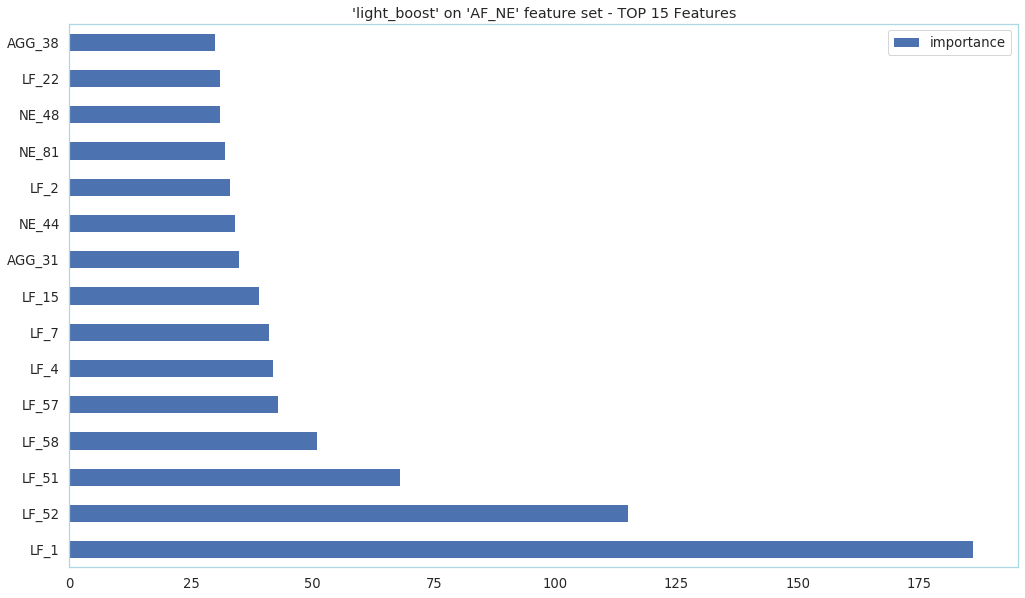

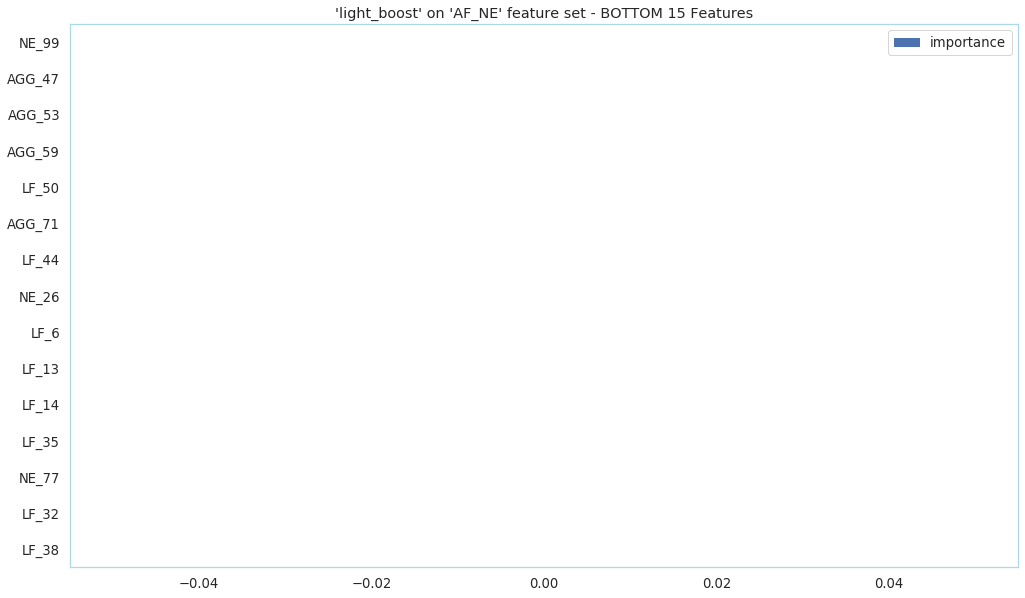

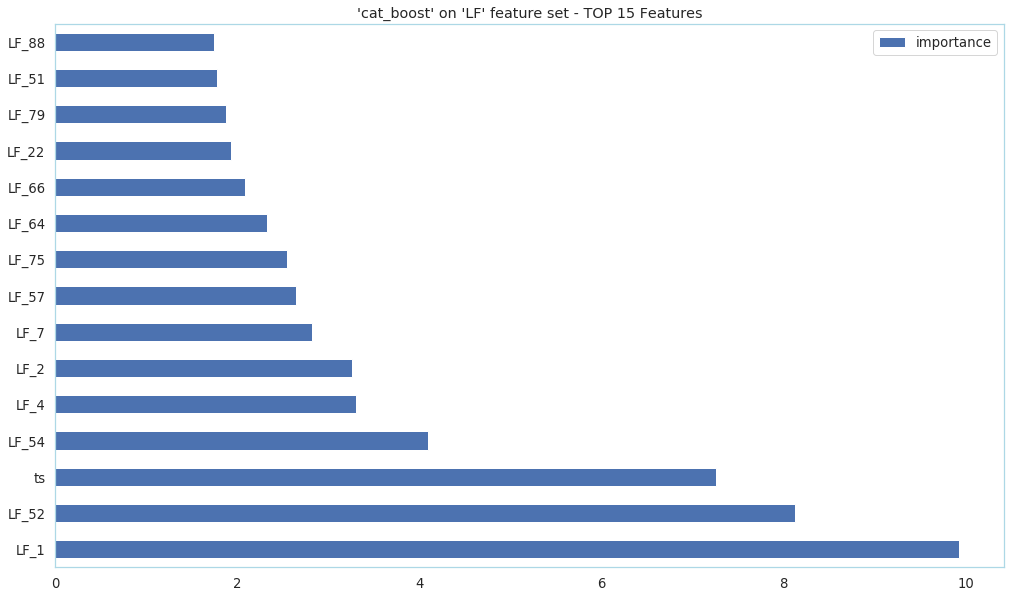

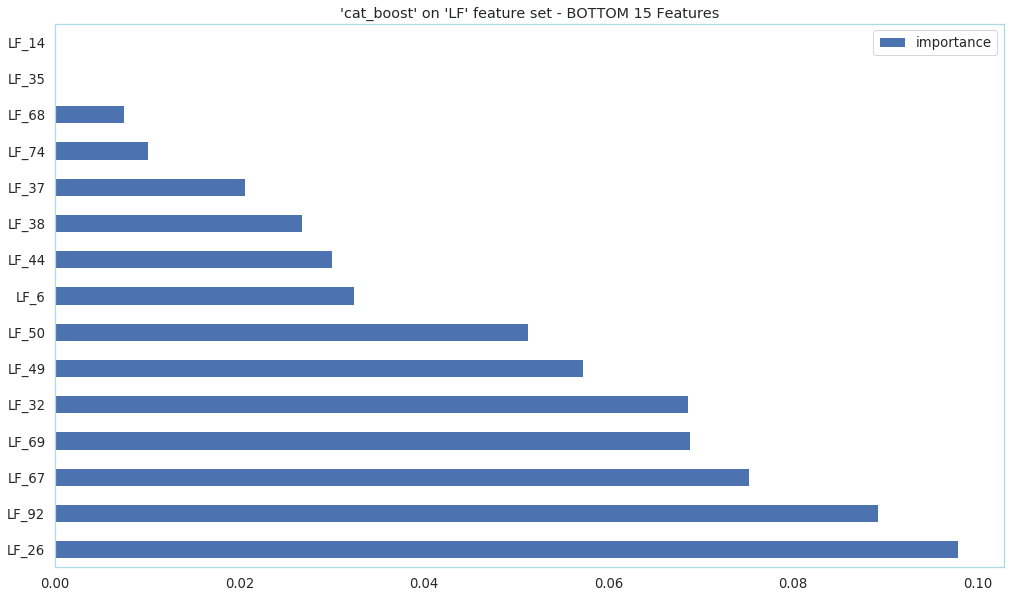

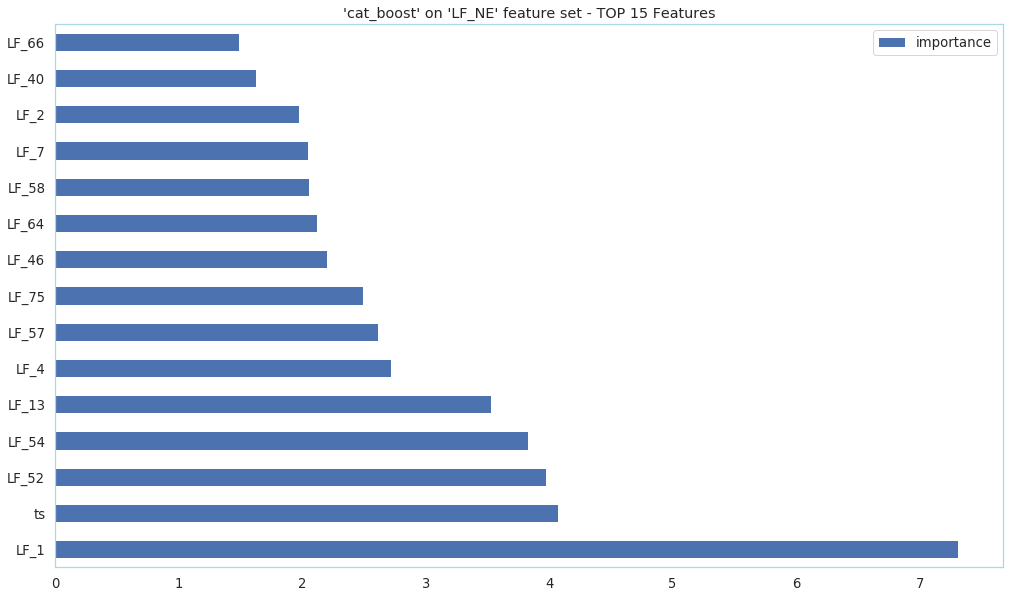

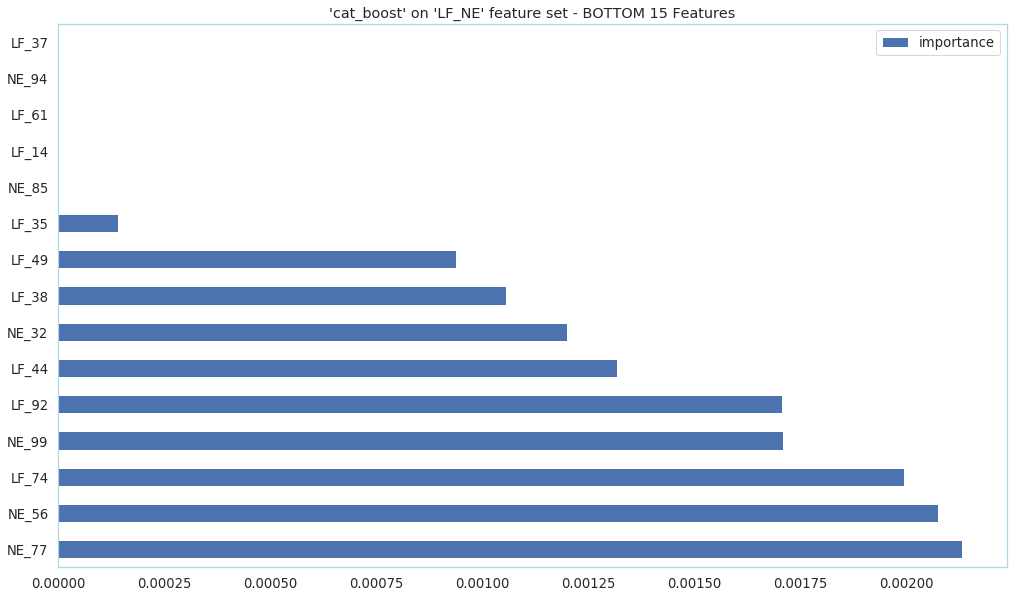

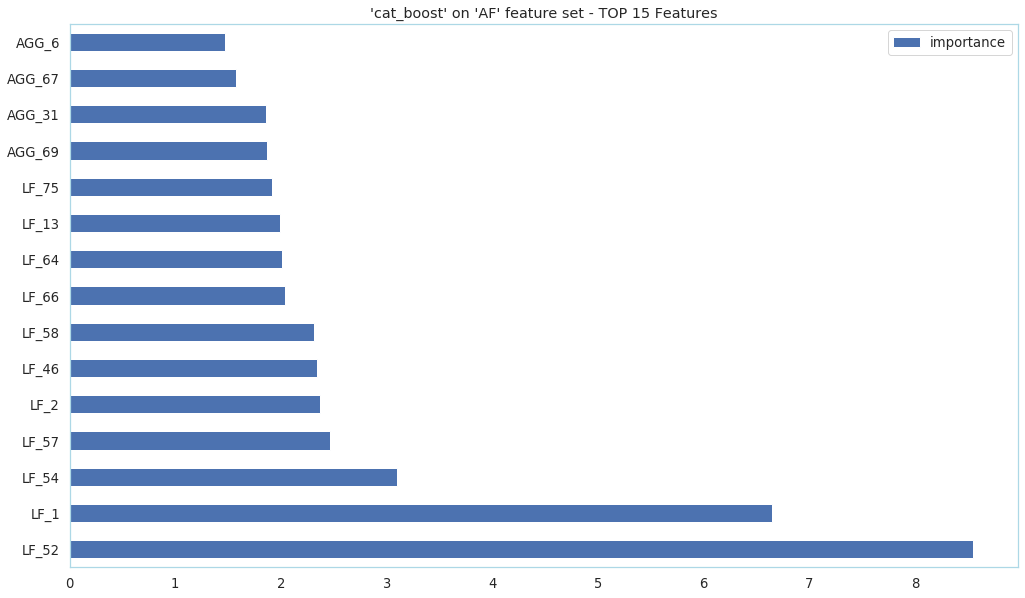

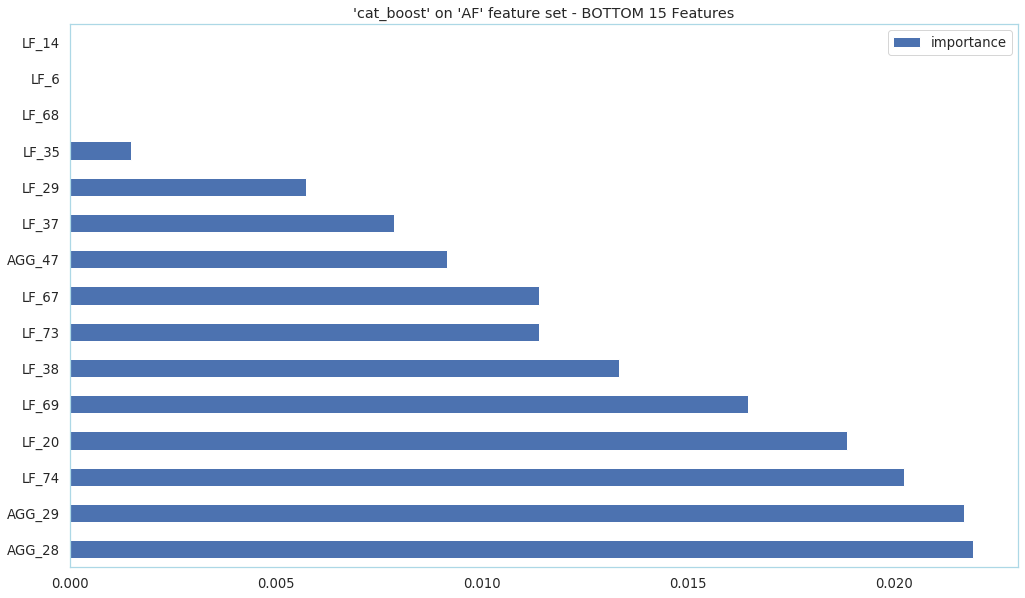

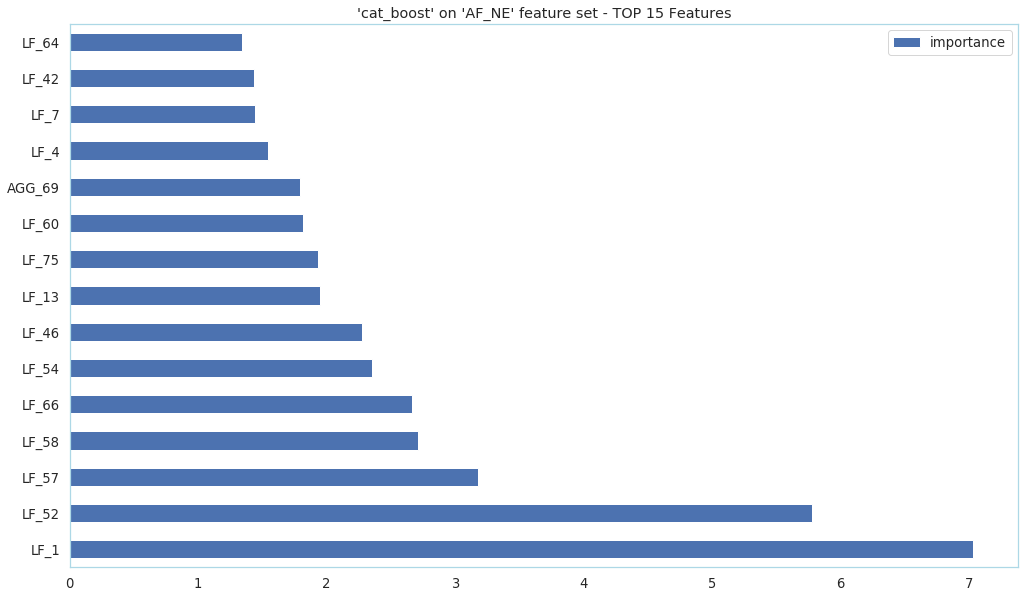

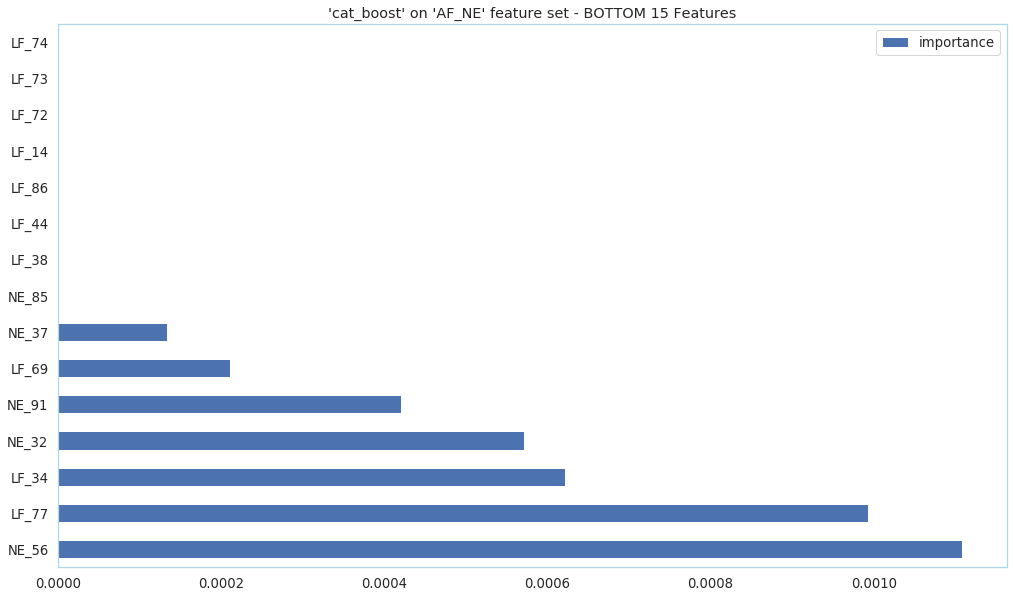

In [13]:
# plot top/bottom N features for boosting models with default parameters 
plot_feature_imp(default_results, N_features)

<a id='defaults_params'></a>
### Model Parameters (Defaults)

In [14]:
# print parameters used to train boosting algorithms with default params
print_model_params(default_results)

Parameters used for 'xg_boost' on 'LF' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.300000012,
    'max_delta_step': 0,
    'max_depth': 6,
    'min_child_weight': 1,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 100,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'subsample': 1,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'LF_NE' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.300000012,
    'max_delta_step': 0,
    'max_depth': 6,
    'min_child_weight': 1,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 100,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'subsample': 1,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'AF' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.300000012,
    'max_delta_step': 0,
    'max_depth': 6,
    'min_child_weight': 1,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 100,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'subsample': 1,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'AF_NE' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.300000012,
    'max_delta_step': 0,
    'max_depth': 6,
    'min_child_weight': 1,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 100,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'subsample': 1,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'light_boost' on 'LF' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': -1,
    'num_leaves': 31,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': True,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}


Parameters used for 'light_boost' on 'LF_NE' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': -1,
    'num_leaves': 31,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': True,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}


Parameters used for 'light_boost' on 'AF' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': -1,
    'num_leaves': 31,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': True,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}


Parameters used for 'light_boost' on 'AF_NE' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': -1,
    'num_leaves': 31,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': True,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}


Parameters used for 'cat_boost' on 'LF' feature set
{   'approx_on_full_history': False,
    'bayesian_matrix_reg': 0.1000000015,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': ['0', '1'],
    'classes_count': 0,
    'depth': 6,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'fold_len_multiplier': 2,
    'fold_permutation_block': 0,
    'has_time': False,
    'iterations': 1000,
    'l2_leaf_reg': 3,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.04382399842,
    'loss_function': 'Logloss',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'permutation_count': 4,
    'random_seed': 0,
    'random_strength': 1,
    'rsm': 1,
    'sampling_frequency': 'PerTree',
    'score_function': 'Cosine',
    'spar

Parameters used for 'cat_boost' on 'LF_NE' feature set
{   'approx_on_full_history': False,
    'bayesian_matrix_reg': 0.1000000015,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': ['0', '1'],
    'classes_count': 0,
    'depth': 6,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'fold_len_multiplier': 2,
    'fold_permutation_block': 0,
    'has_time': False,
    'iterations': 1000,
    'l2_leaf_reg': 3,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.04382399842,
    'loss_function': 'Logloss',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'permutation_count': 4,
    'random_seed': 0,
    'random_strength': 1,
    'rsm': 1,
    'sampling_frequency': 'PerTree',
    'score_function': 'Cosine',
    's

Parameters used for 'cat_boost' on 'AF' feature set
{   'approx_on_full_history': False,
    'bayesian_matrix_reg': 0.1000000015,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': ['0', '1'],
    'classes_count': 0,
    'depth': 6,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'fold_len_multiplier': 2,
    'fold_permutation_block': 0,
    'has_time': False,
    'iterations': 1000,
    'l2_leaf_reg': 3,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.04382399842,
    'loss_function': 'Logloss',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'permutation_count': 4,
    'random_seed': 0,
    'random_strength': 1,
    'rsm': 1,
    'sampling_frequency': 'PerTree',
    'score_function': 'Cosine',
    'spar

Parameters used for 'cat_boost' on 'AF_NE' feature set
{   'approx_on_full_history': False,
    'bayesian_matrix_reg': 0.1000000015,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': ['0', '1'],
    'classes_count': 0,
    'depth': 6,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'fold_len_multiplier': 2,
    'fold_permutation_block': 0,
    'has_time': False,
    'iterations': 1000,
    'l2_leaf_reg': 3,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.04382399842,
    'loss_function': 'Logloss',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'permutation_count': 4,
    'random_seed': 0,
    'random_strength': 1,
    'rsm': 1,
    'sampling_frequency': 'PerTree',
    'score_function': 'Cosine',
    's

<a id='tuned'></a>
## Tuned Parameters - Boosting Models
- [XGBoost: eXtreme Gradient Boosting](https://xgboost.readthedocs.io/en/latest/) 
- [LightGBM: Light Gradient Boosting Machine](https://lightgbm.readthedocs.io/en/latest/) 
- [CatBoost](https://catboost.ai/) 

In [15]:
# load results for tuned models
tuned_results = read_pickle(TUNED_RESULTS)

<a id='tuned_eval'></a>
### Evaluation Metrics (Tuned)
- <i>Precision</i> 
- <i>Recall</i> 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- AUC
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [16]:
# dataframe with all the perfomance metrics
print("Performance metrics for tuned boosting models")
tuned_metrics_df = results_table(tuned_results)
display(tuned_metrics_df)

# sorted by f1 score
print("Performance metrics for tuned boosting models sorted by f1-score")
display(tuned_metrics_df.sort_values("f1", ascending=False))

Performance metrics for tuned boosting models


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_LF,0.912,0.689,0.975,0.975,0.842,0.785
1,xg_boost_LF_NE,0.989,0.687,0.979,0.979,0.843,0.811
2,xg_boost_AF,0.927,0.724,0.978,0.978,0.860,0.813
3,xg_boost_AF_NE,0.984,0.697,0.980,0.980,0.848,0.816
4,light_boost_LF,0.903,0.704,0.976,0.976,0.849,0.791
5,light_boost_LF_NE,0.987,0.686,0.979,0.979,0.843,0.809
6,light_boost_AF,0.945,0.718,0.979,0.979,0.858,0.816
7,light_boost_AF_NE,0.982,0.692,0.979,0.979,0.845,0.811
8,cat_boost_LF,0.837,0.720,0.973,0.973,0.855,0.774
9,cat_boost_LF_NE,0.956,0.688,0.978,0.978,0.843,0.800


Performance metrics for tuned boosting models sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
10,cat_boost_AF,0.946,0.732,0.980,0.980,0.865,0.826
11,cat_boost_AF_NE,0.977,0.702,0.980,0.980,0.850,0.817
3,xg_boost_AF_NE,0.984,0.697,0.980,0.980,0.848,0.816
6,light_boost_AF,0.945,0.718,0.979,0.979,0.858,0.816
2,xg_boost_AF,0.927,0.724,0.978,0.978,0.860,0.813
1,xg_boost_LF_NE,0.989,0.687,0.979,0.979,0.843,0.811
7,light_boost_AF_NE,0.982,0.692,0.979,0.979,0.845,0.811
5,light_boost_LF_NE,0.987,0.686,0.979,0.979,0.843,0.809
9,cat_boost_LF_NE,0.956,0.688,0.978,0.978,0.843,0.800
4,light_boost_LF,0.903,0.704,0.976,0.976,0.849,0.791


<a id='tuned_confusion'></a>
### Confusion Matrices (Tuned)

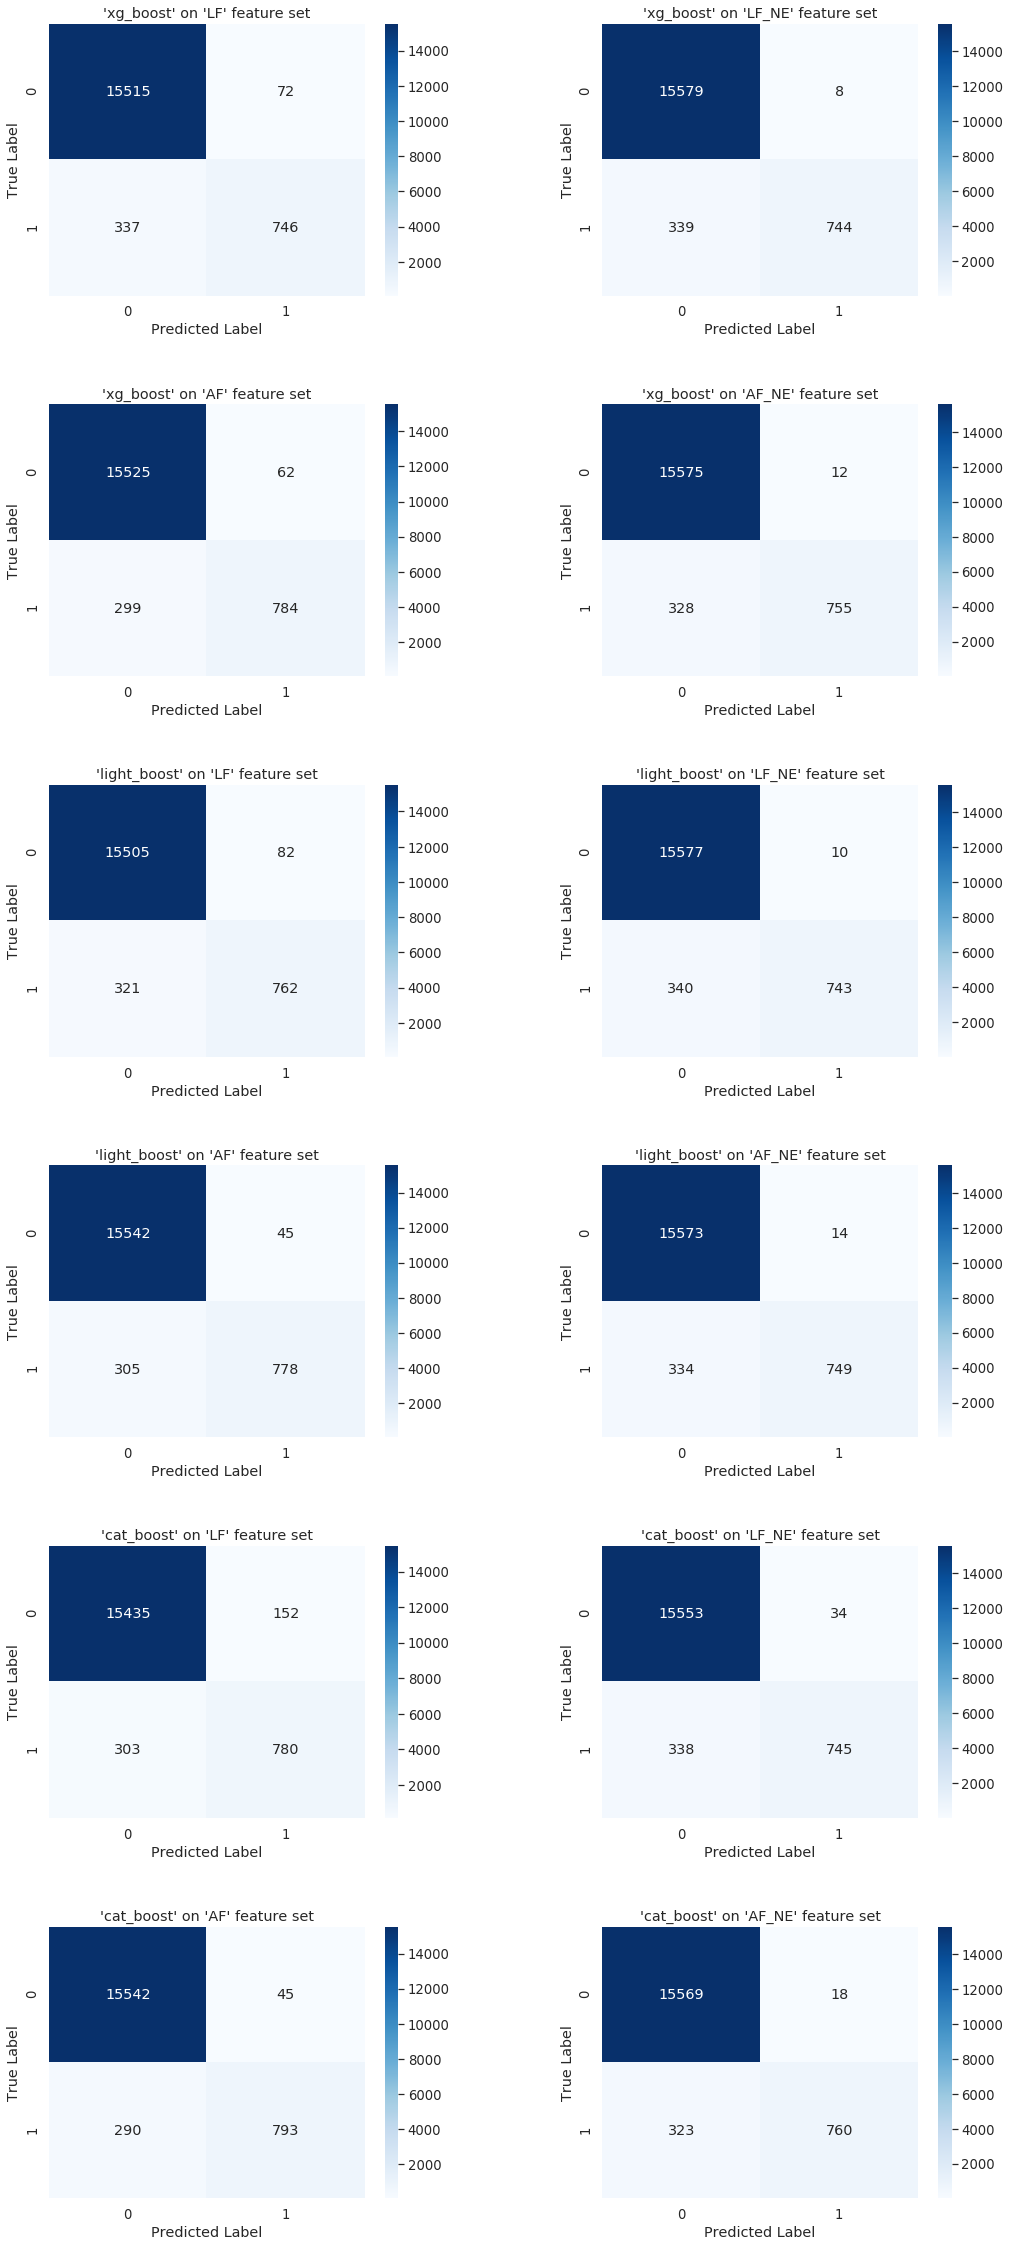

In [17]:
# plot confusion matrices for boosting models with tuned parameters 
plot_result_matrices(tuned_results, figsize=(17,40))

<a id='tuned_time'></a>
### F1 Results over Test Time Span (Tuned)

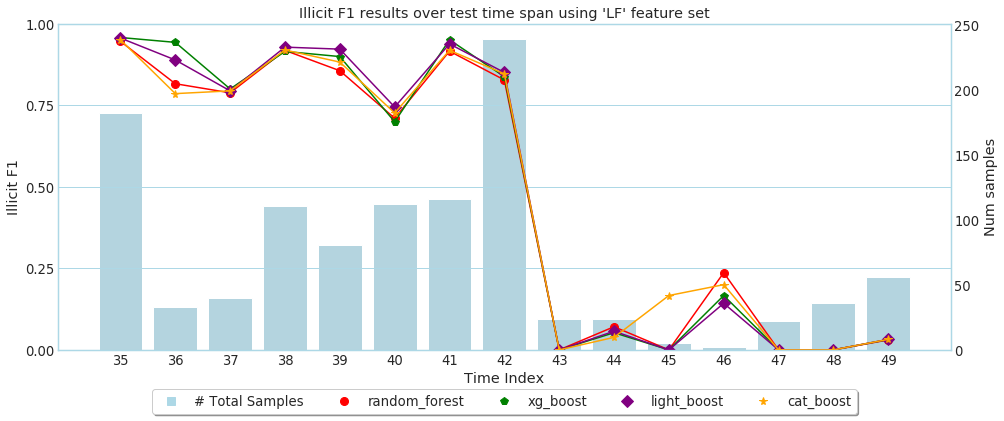

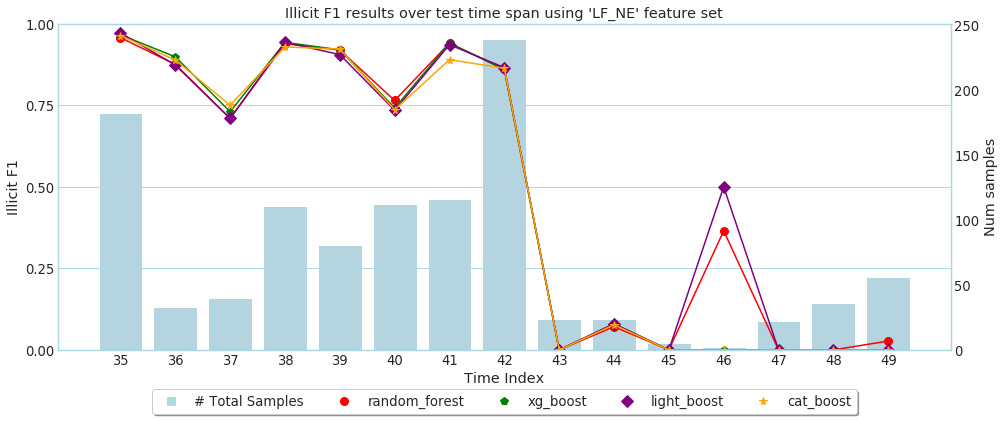

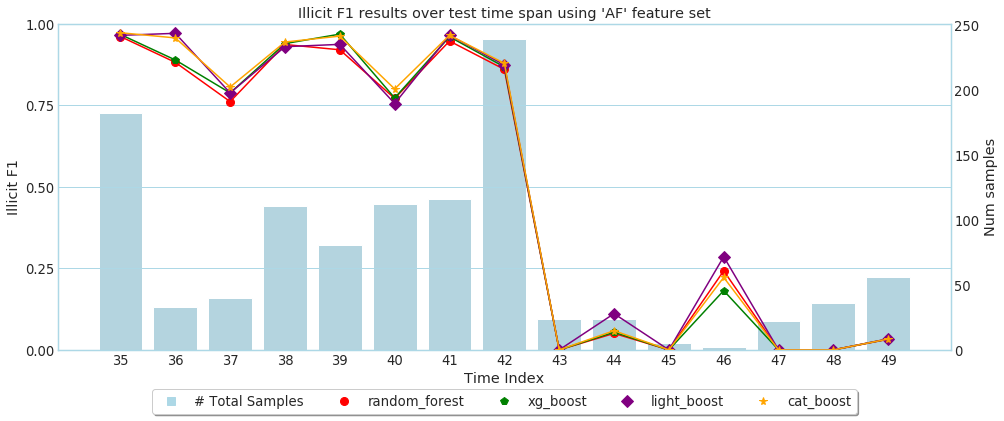

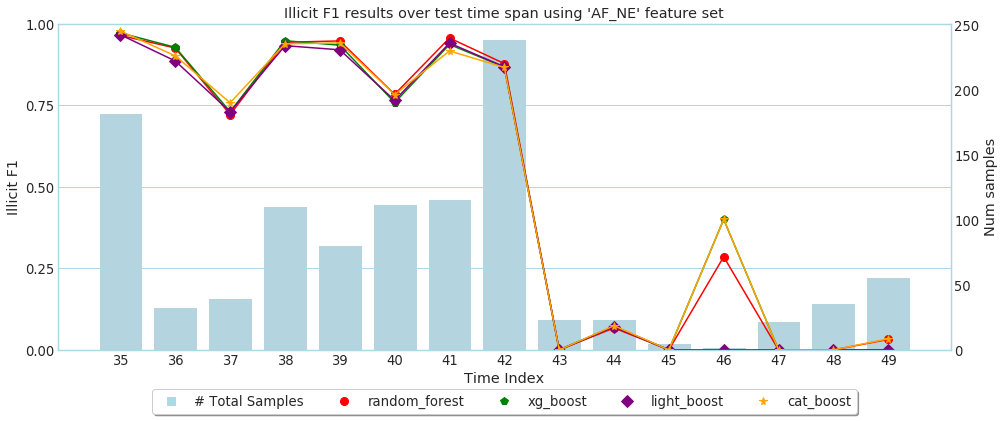

In [18]:
# plot f1 results over test time span, 
# for boosting models with default parameters 

# in this plot we also display benchmark model
tmp_results = {**benchmark_results, **tuned_results}
elliptic_time_indexed_results(tmp_results)

<a id='tuned_importance'></a>
### Feature Importance (Tuned)

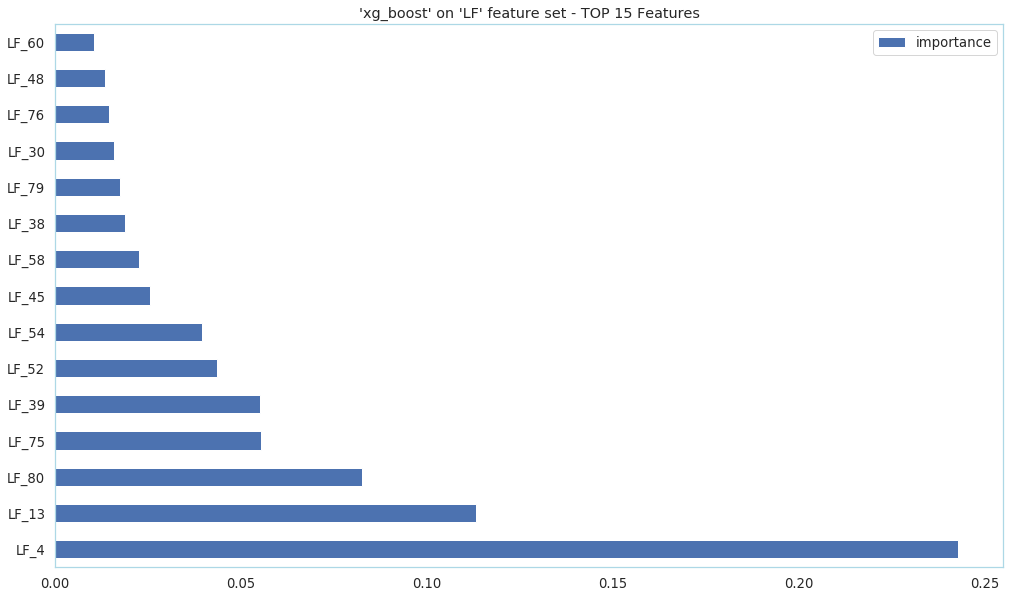

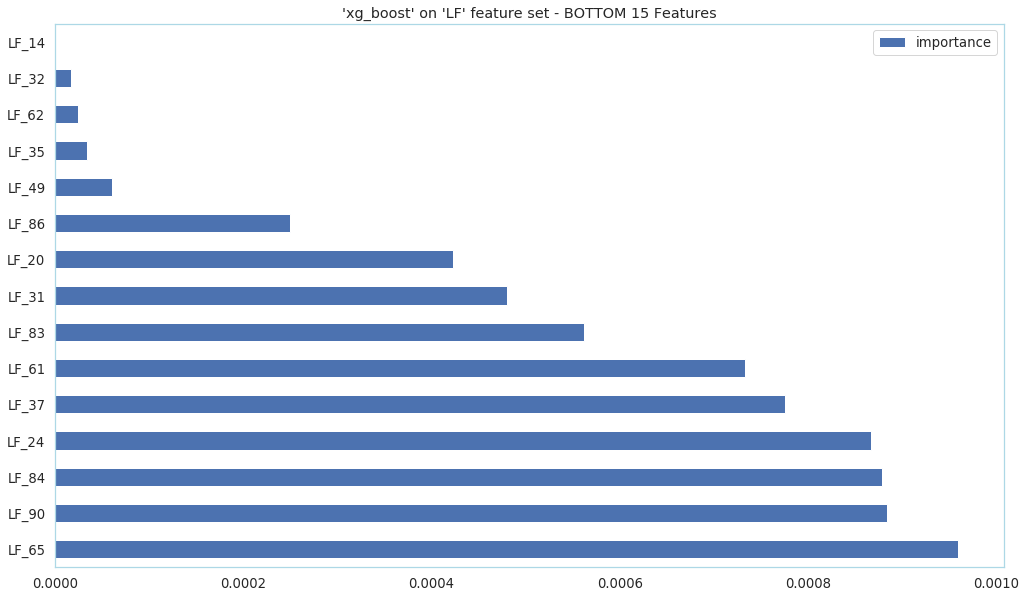

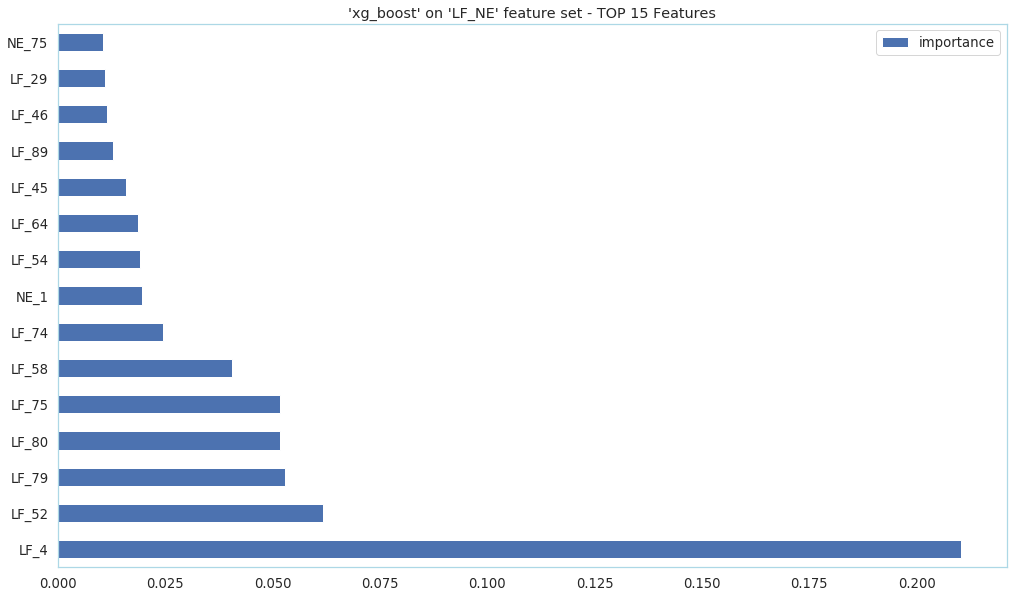

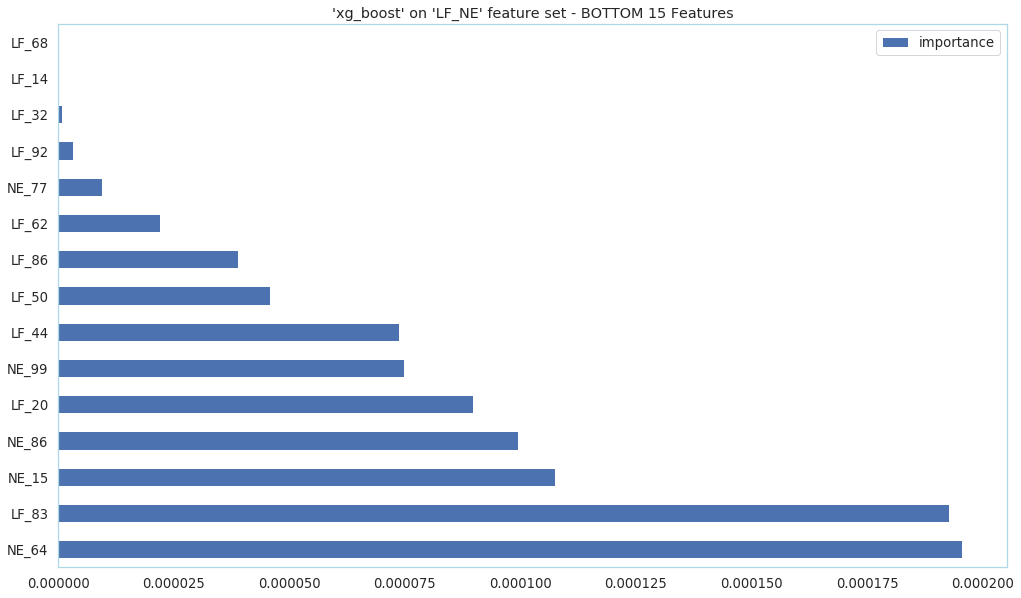

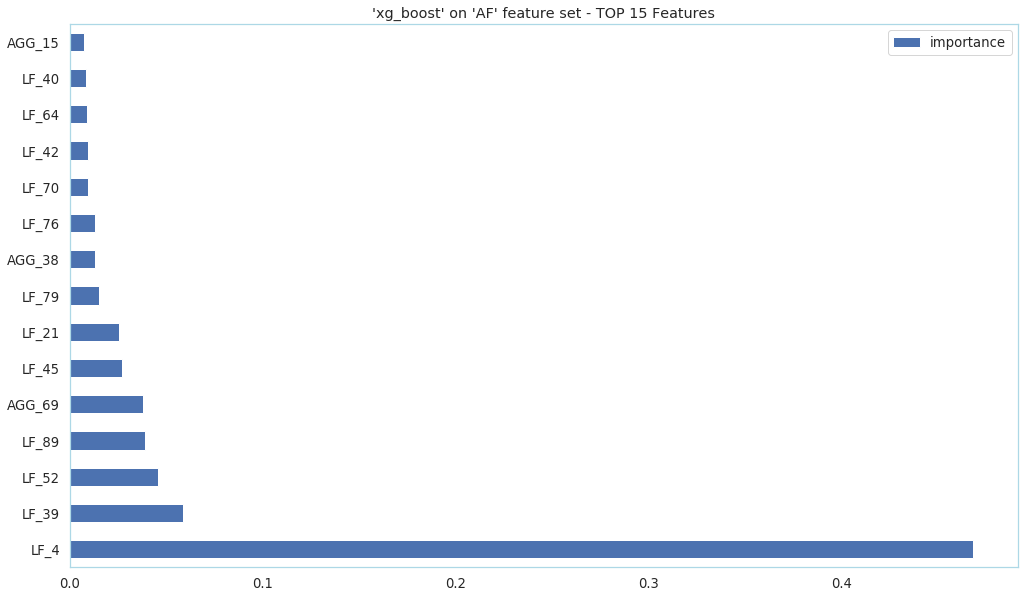

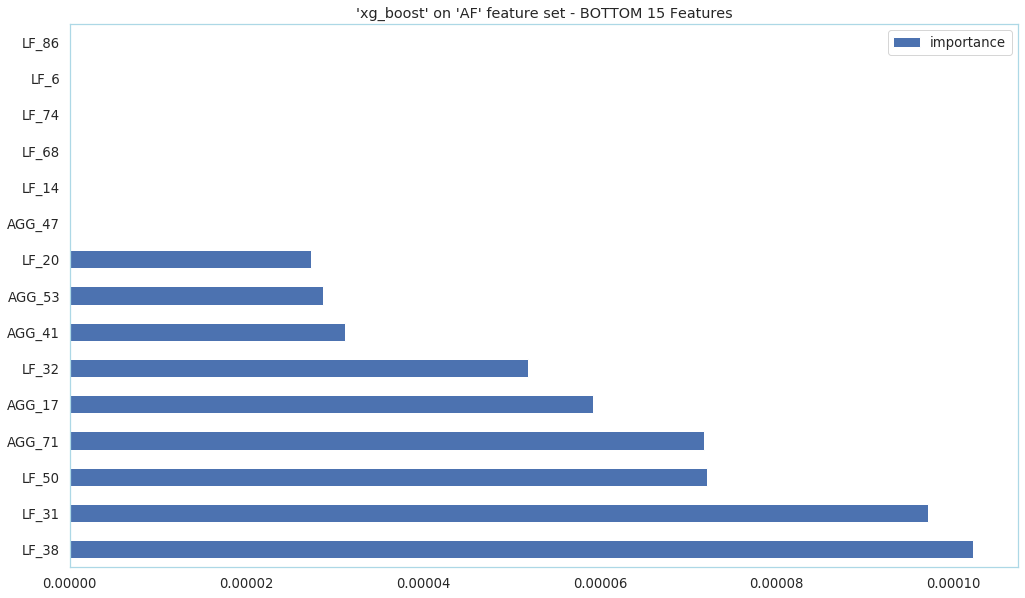

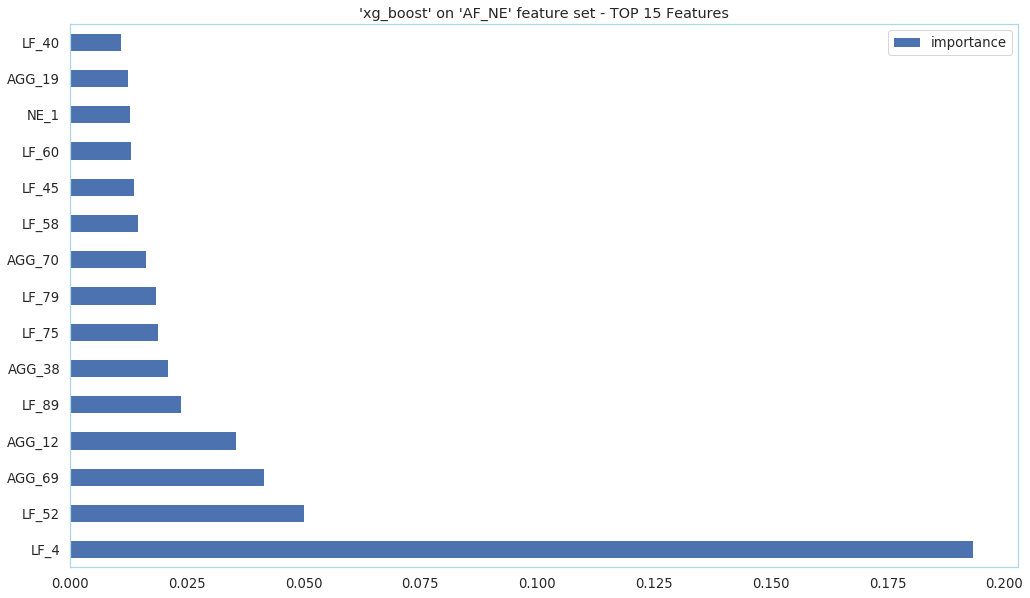

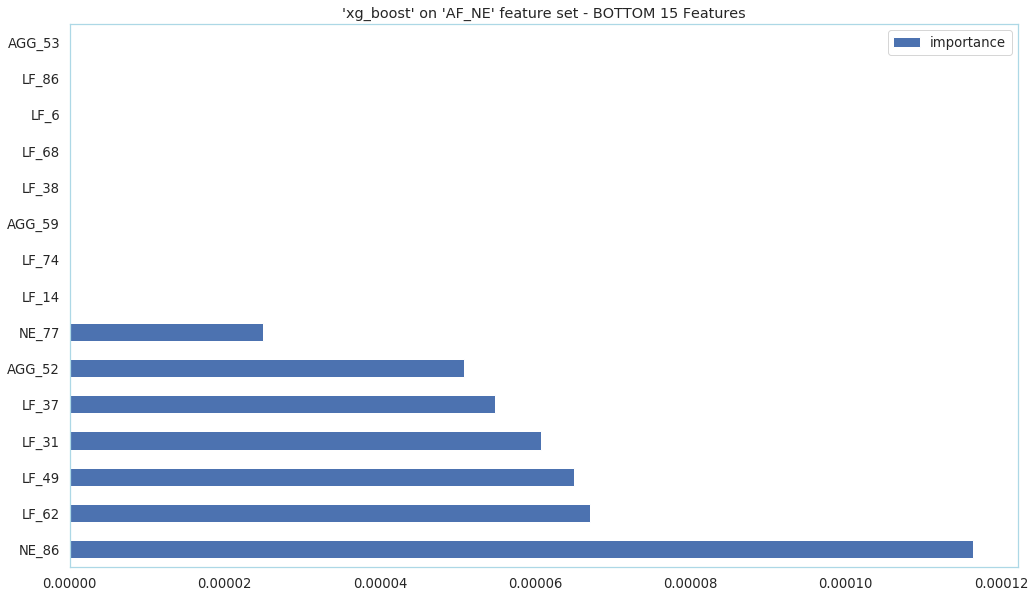

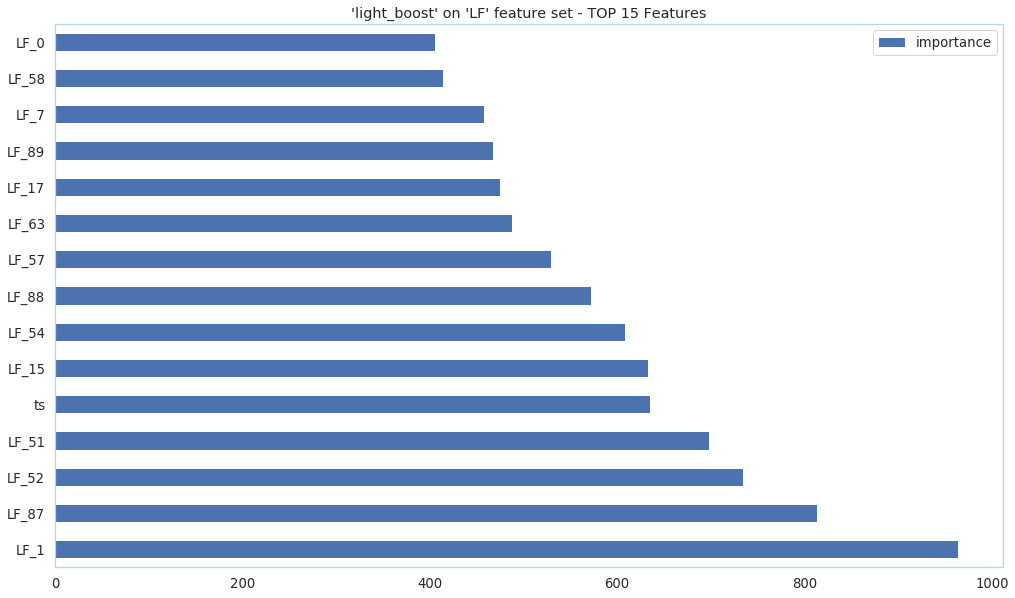

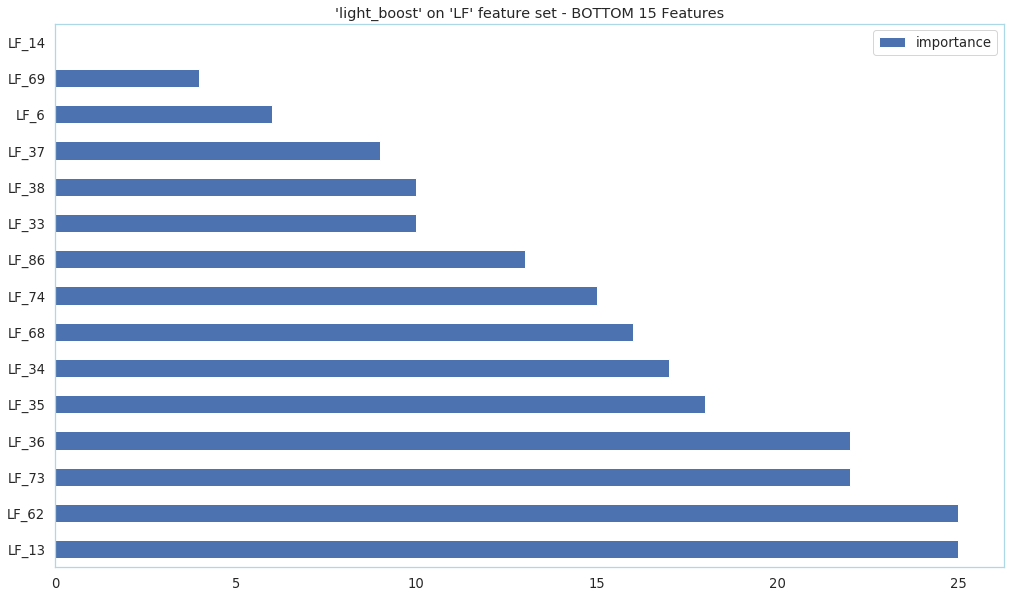

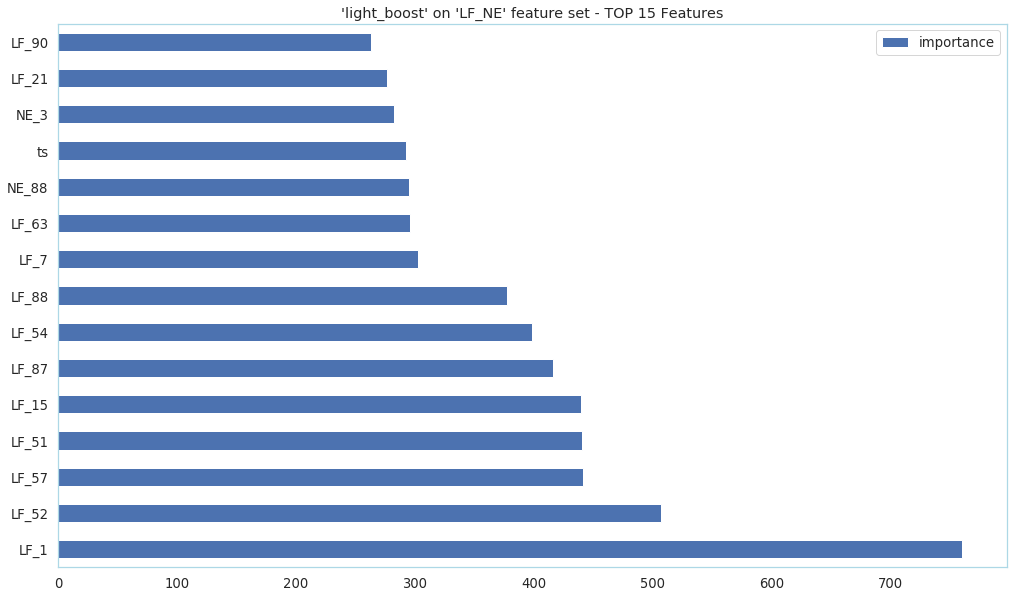

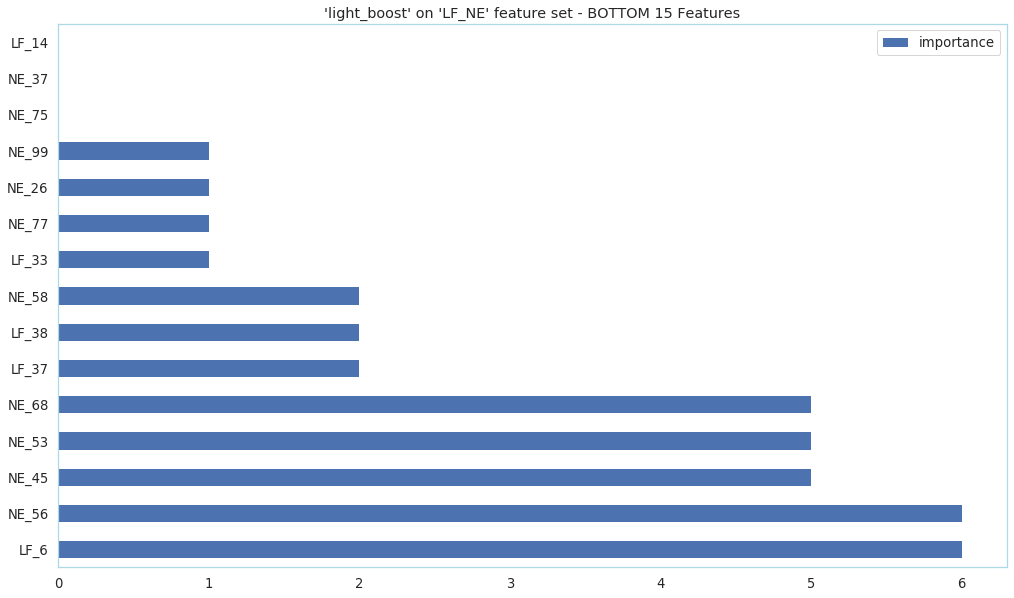

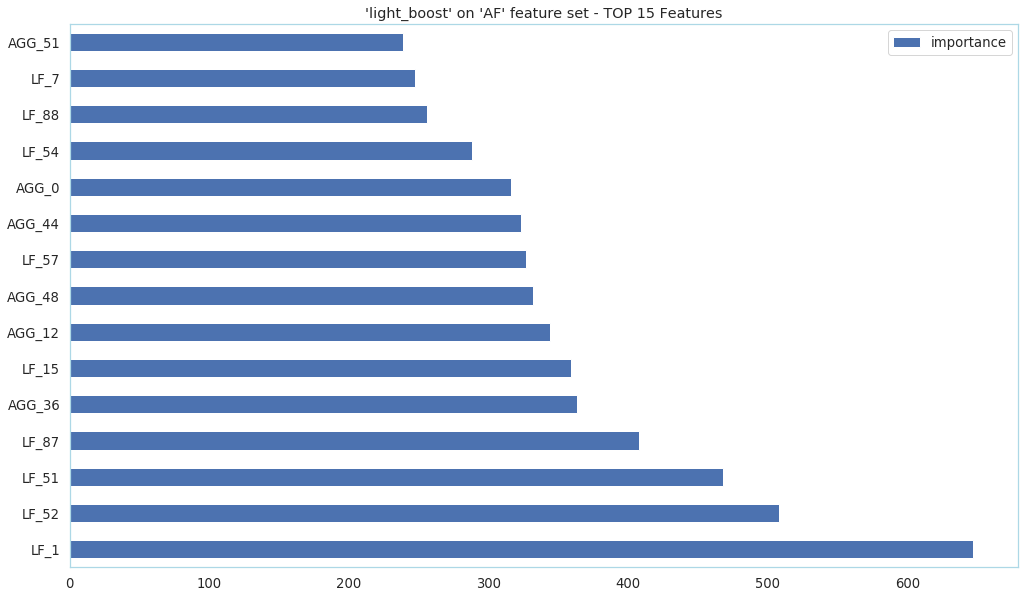

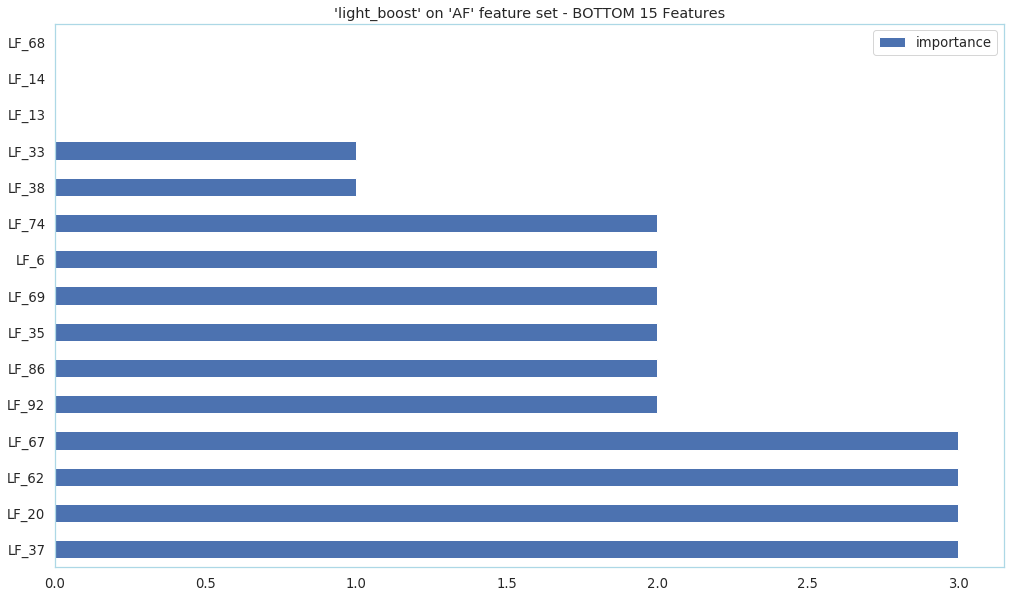

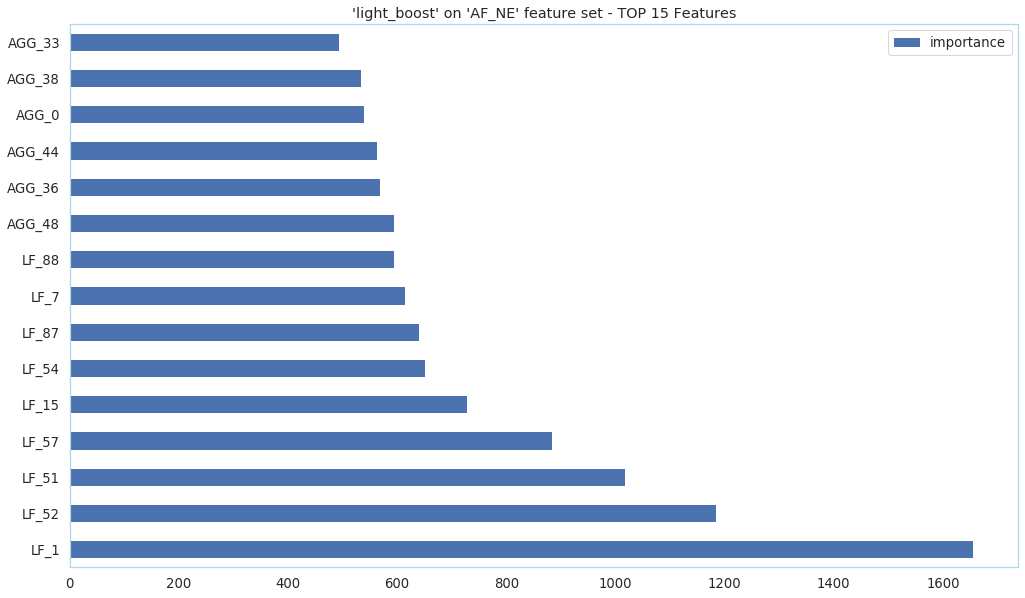

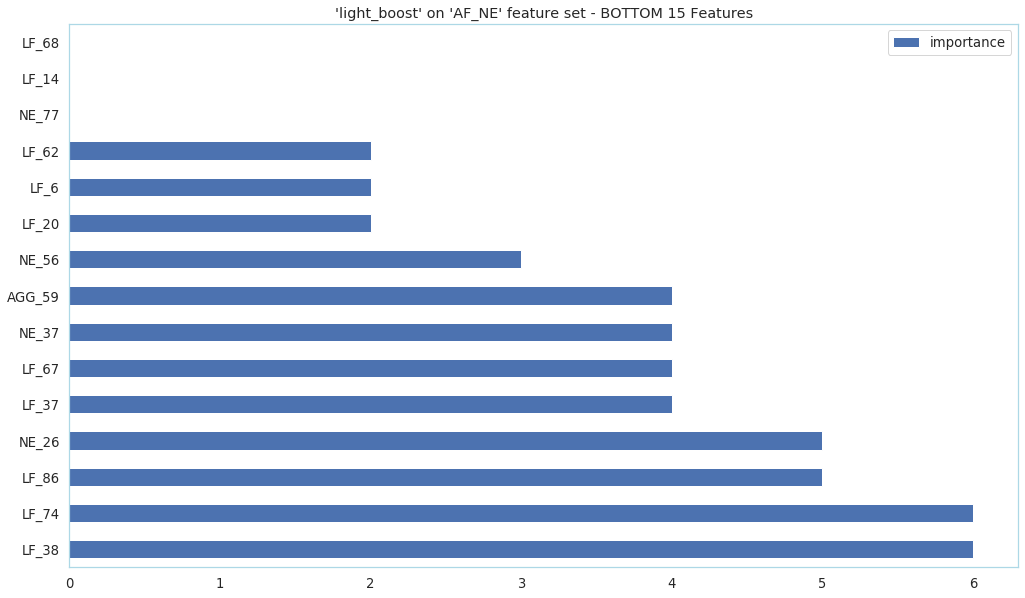

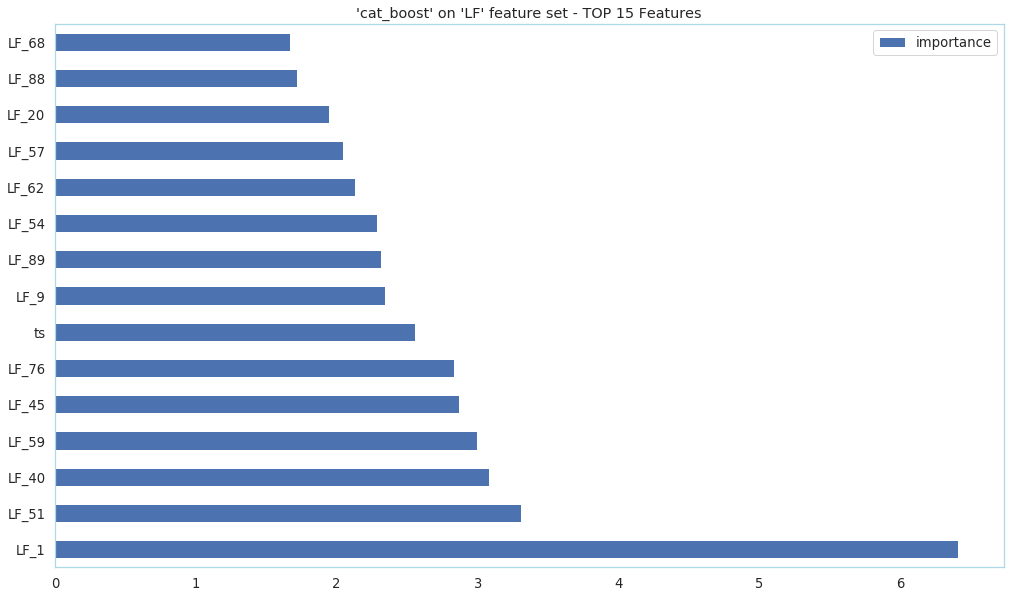

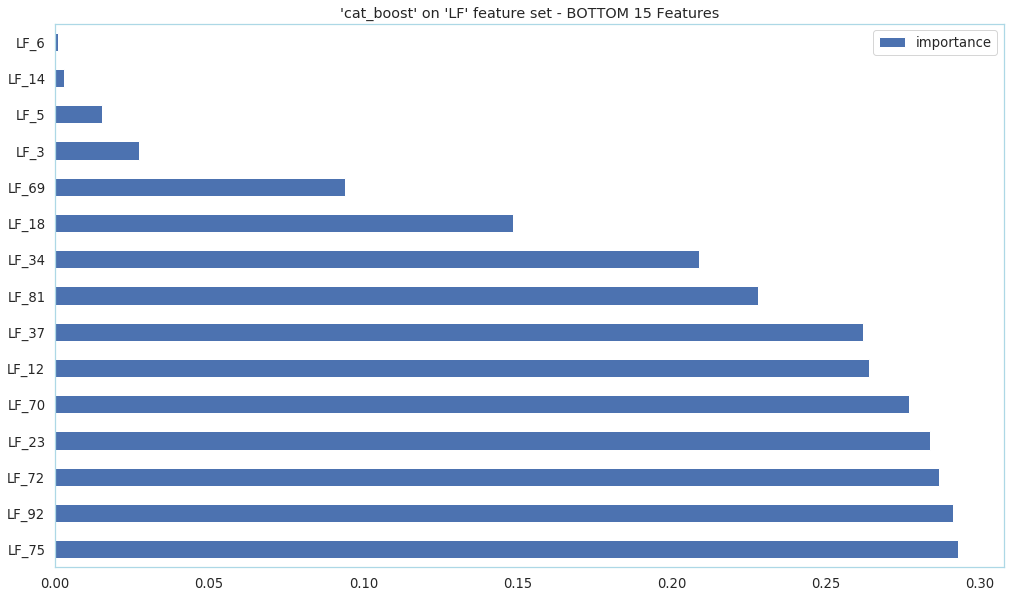

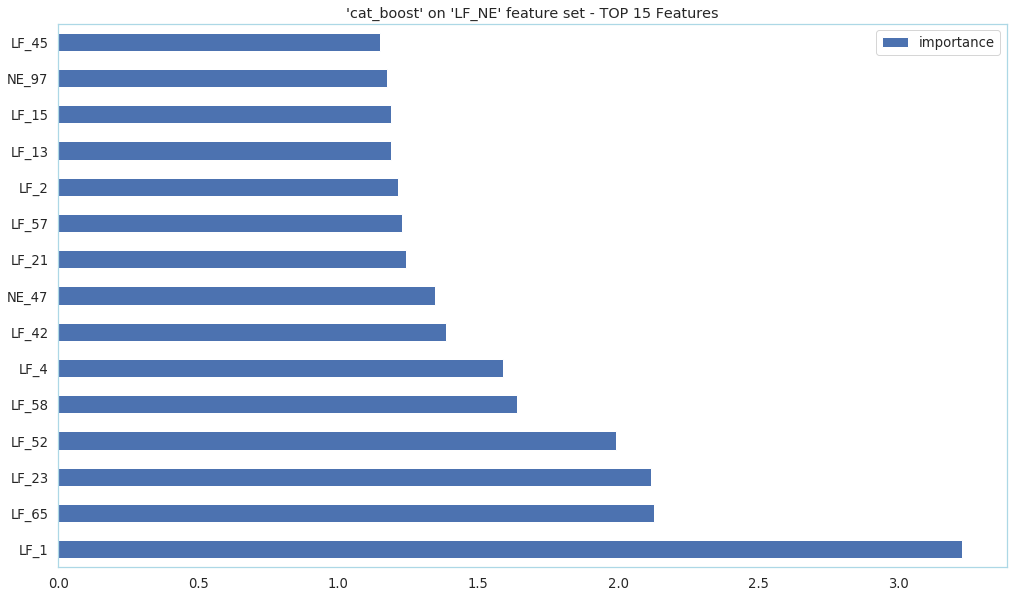

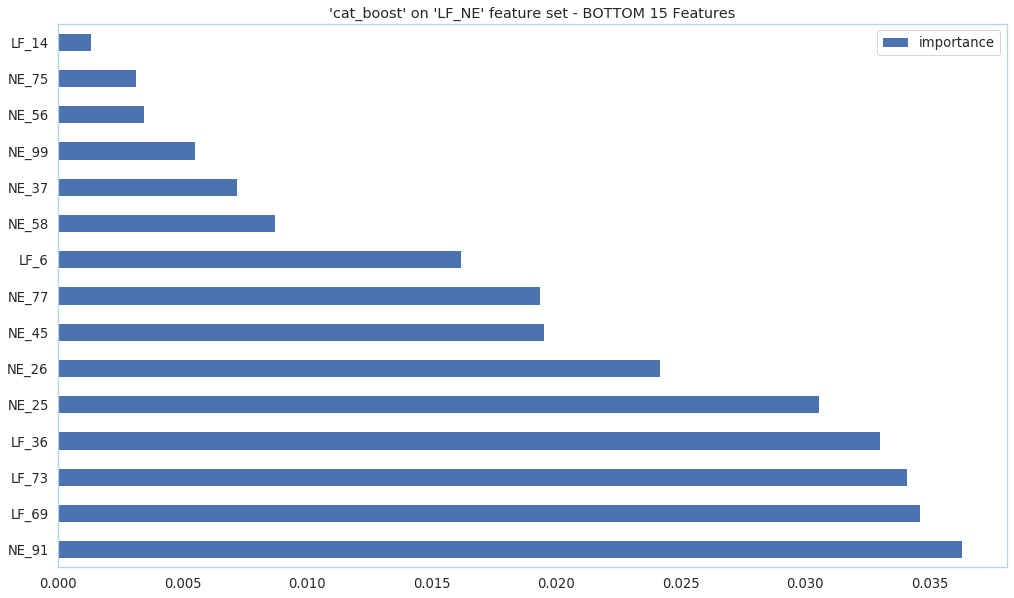

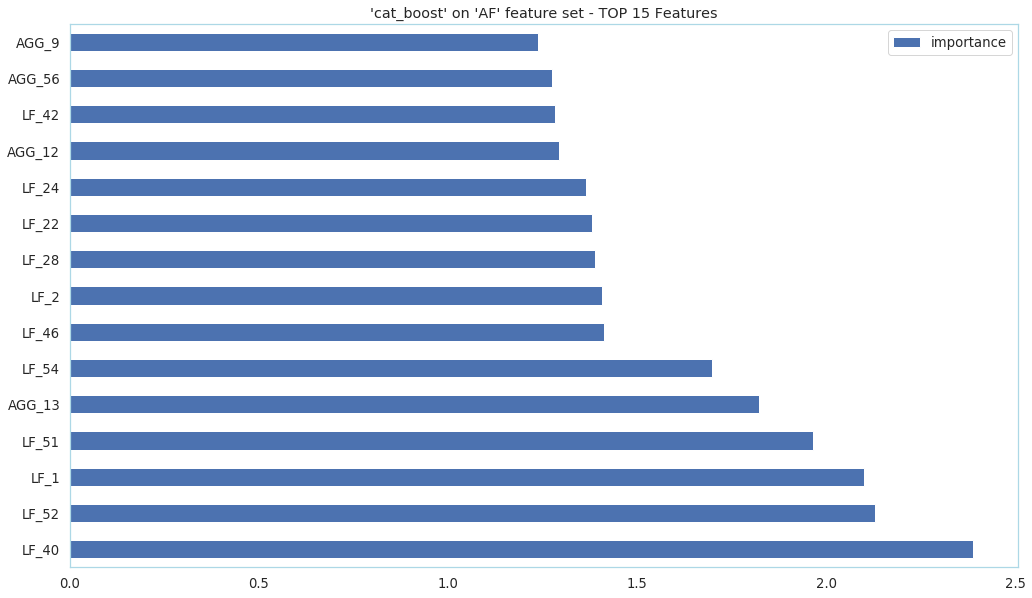

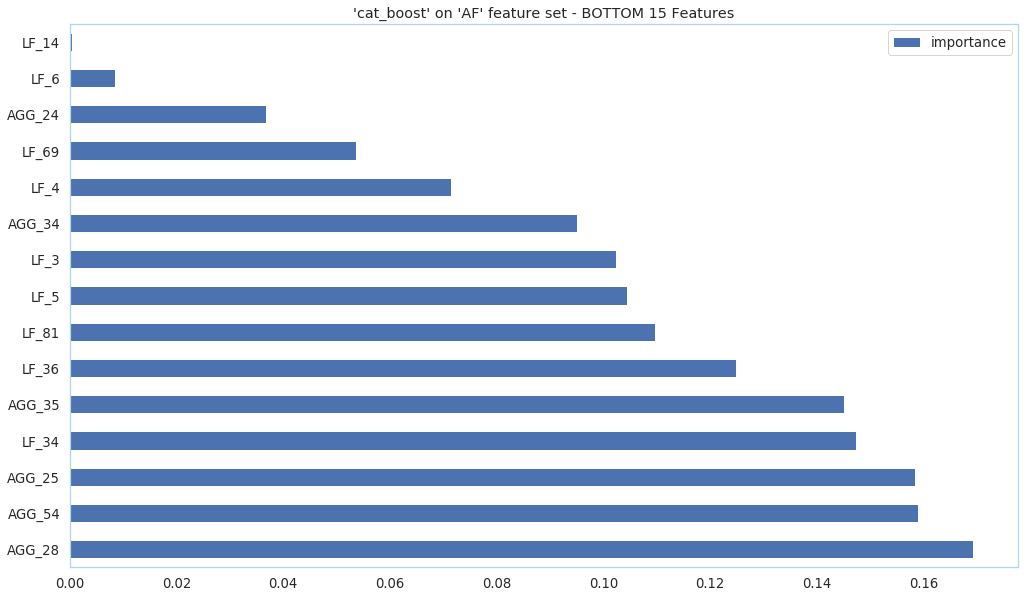

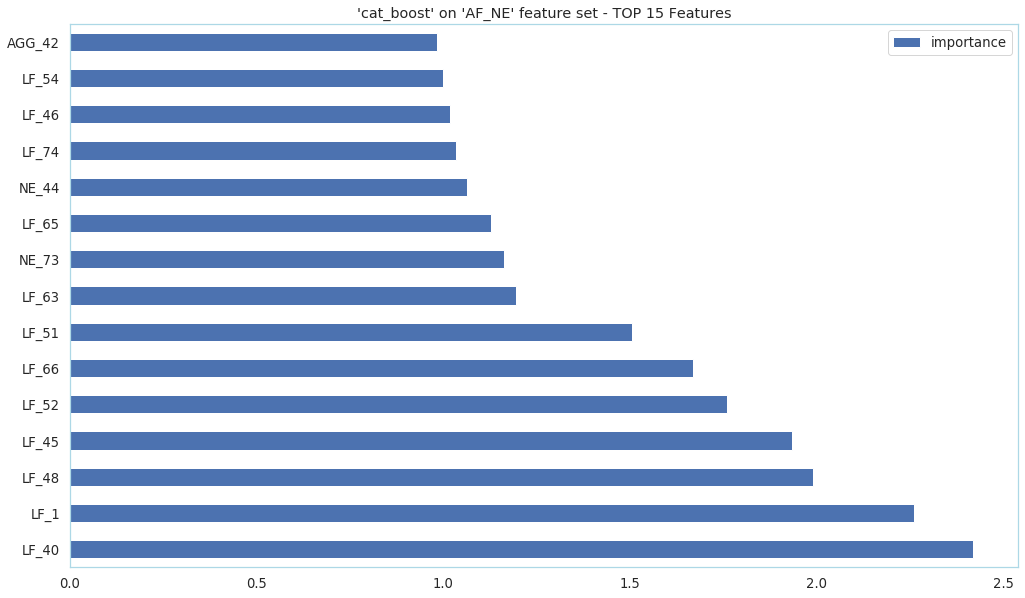

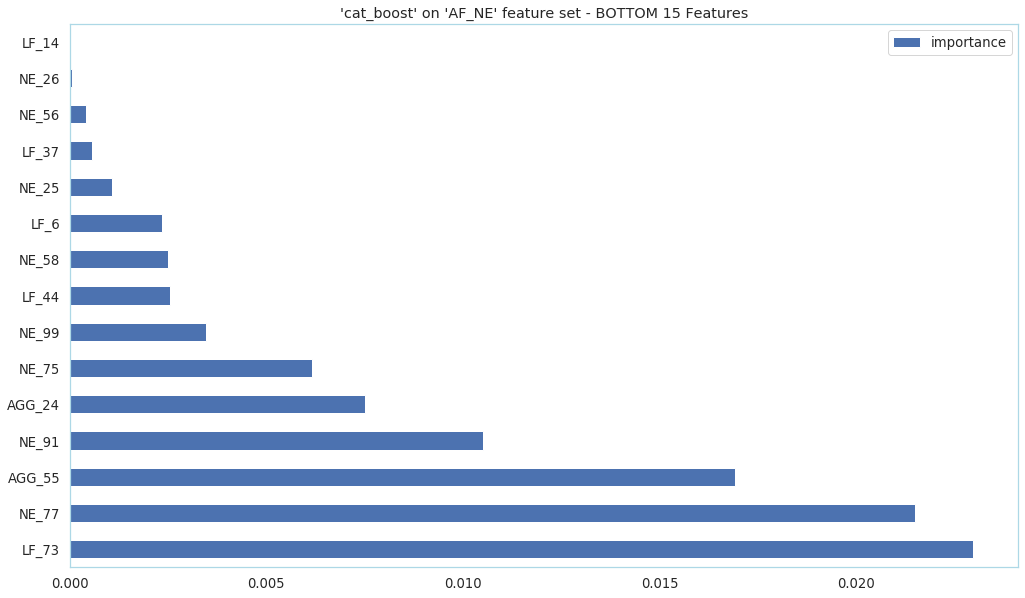

In [19]:
# plot top/bottom N features for boosting models with tuned parameters 
plot_feature_imp(tuned_results, N_features)

<a id='tuned_tuning'></a>
### Hyperparameter Tuning Studies

- Hyperparameters were tuned using stepwise tuning (100 iterations each step)
- Both steps utilise the 70% train dataset
- Cross validation applied during each iteration (Stratified Kfold and K=10)
- First step we tune n_estimators and learning rate using RandomSearch 
- Then we train the other parameters using a Bayesian Optimization - Tree Parzen Estimator (TPE)

Why stepwise tuning ?

<i>“As described in Sections 2.1 and 2.2, a trade-off exists among maximum tree depth, learning rate and the number of iteration in GB and XGBoost, which violates the independence assumption in the TPE algorithm. Therefore, we introduce a stepwise training process. First, learning rate and the number of boosts are manually determined. We follow the default learning rate 0.1, which is also suggested value in GB (Friedman, 2001).“ </i>

From: [A boosted decision tree approach using Bayesian hyper-parameter optimization for credit scoring](https://www.sciencedirect.com/science/article/abs/pii/S0957417417301008)

TODO: Discuss what to show here with supervisors

<a id='tuned_params'></a>
### Model Parameters (Tuned)

In [20]:
# print parameters used to train boosting algorithms with tuned params
print_model_params(tuned_results)

Parameters used for 'xg_boost' on 'LF' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 0.9189218108942864,
    'gamma': 0.00125,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.2825,
    'max_delta_step': 1,
    'max_depth': 11,
    'min_child_weight': 0,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 275,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 2.752868648372344e-08,
    'reg_lambda': 5.205784657356083e-06,
    'scale_pos_weight': 1,
    'subsample': 0.9349894939491086,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'LF_NE' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 0.9628498769407853,
    'gamma': 0.0,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.085,
    'max_delta_step': 0,
    'max_depth': 9,
    'min_child_weight': 0,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 600,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 2.3154577249592235e-05,
    'reg_lambda': 0.011511136982598818,
    'scale_pos_weight': 1,
    'subsample': 0.9099822047532131,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'AF' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 0.9020405533670462,
    'gamma': 0.010750000000000001,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.3,
    'max_delta_step': 0,
    'max_depth': 7,
    'min_child_weight': 0,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 450,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 3.27144418388647e-08,
    'reg_lambda': 0.959909924979428,
    'scale_pos_weight': 1,
    'subsample': 0.9193293644242201,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'AF_NE' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 0.9524230003454723,
    'gamma': 0.009000000000000001,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.0975,
    'max_delta_step': 0,
    'max_depth': 7,
    'min_child_weight': 0,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 725,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0.00015817071821964092,
    'reg_lambda': 9.261006493857333e-06,
    'scale_pos_weight': 1,
    'subsample': 0.9260230579439048,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'light_boost' on 'LF' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 0.40492048088545524,
    'importance_type': 'split',
    'learning_rate': 0.2125,
    'max_depth': -1,
    'min_child_samples': 7,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 425,
    'n_jobs': -1,
    'num_leaves': 228,
    'objective': None,
    'random_state': None,
    'reg_alpha': 6.12050129647087e-05,
    'reg_lambda': 0.0010072439364763135,
    'silent': True,
    'subsample': 0.6767927031918298,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}


Parameters used for 'light_boost' on 'LF_NE' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 0.4401195702365412,
    'importance_type': 'split',
    'learning_rate': 0.1075,
    'max_depth': -1,
    'min_child_samples': 29,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 475,
    'n_jobs': -1,
    'num_leaves': 109,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.00042202892157929586,
    'reg_lambda': 4.655929981337116e-06,
    'silent': True,
    'subsample': 0.4496293864451597,
    'subsample_for_bin': 200000,
    'subsample_freq': 1}


Parameters used for 'light_boost' on 'AF' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 0.9499437796685836,
    'importance_type': 'split',
    'learning_rate': 0.225,
    'max_depth': -1,
    'min_child_samples': 16,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 500,
    'n_jobs': -1,
    'num_leaves': 59,
    'objective': None,
    'random_state': None,
    'reg_alpha': 6.59028379837432e-05,
    'reg_lambda': 0.02205390242560248,
    'silent': True,
    'subsample': 0.4640185758005923,
    'subsample_for_bin': 200000,
    'subsample_freq': 1}


Parameters used for 'light_boost' on 'AF_NE' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 0.8929900537613774,
    'importance_type': 'split',
    'learning_rate': 0.0575,
    'max_depth': -1,
    'min_child_samples': 80,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 850,
    'n_jobs': -1,
    'num_leaves': 196,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.0007286819887214904,
    'reg_lambda': 0.028896357552744174,
    'silent': True,
    'subsample': 0.9034581785516684,
    'subsample_for_bin': 200000,
    'subsample_freq': 1}


Parameters used for 'cat_boost' on 'LF' feature set
{   'approx_on_full_history': False,
    'bayesian_matrix_reg': 0.1000000015,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': ['0', '1'],
    'classes_count': 0,
    'depth': 10,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'fold_len_multiplier': 2,
    'fold_permutation_block': 0,
    'has_time': False,
    'iterations': 100,
    'l2_leaf_reg': 4.800000191,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.1599999964,
    'loss_function': 'Logloss',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'permutation_count': 4,
    'random_seed': 0,
    'random_strength': 49.41916275,
    'rsm': 0.04436100274,
    'sampling_frequency': 'PerTree',
    'score

Parameters used for 'cat_boost' on 'LF_NE' feature set
{   'approx_on_full_history': False,
    'bayesian_matrix_reg': 0.1000000015,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': ['0', '1'],
    'classes_count': 0,
    'depth': 9,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'fold_len_multiplier': 2,
    'fold_permutation_block': 0,
    'has_time': False,
    'iterations': 425,
    'l2_leaf_reg': 3.799999952,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.1150000021,
    'loss_function': 'Logloss',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'permutation_count': 4,
    'random_seed': 0,
    'random_strength': 18.54733658,
    'rsm': 0.02126958966,
    'sampling_frequency': 'PerTree',
    'sco

Parameters used for 'cat_boost' on 'AF' feature set
{   'approx_on_full_history': False,
    'bayesian_matrix_reg': 0.1000000015,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': ['0', '1'],
    'classes_count': 0,
    'depth': 10,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'fold_len_multiplier': 2,
    'fold_permutation_block': 0,
    'has_time': False,
    'iterations': 300,
    'l2_leaf_reg': 5.550000191,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.1199999973,
    'loss_function': 'Logloss',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'permutation_count': 4,
    'random_seed': 0,
    'random_strength': 60.06633759,
    'rsm': 0.02889848314,
    'sampling_frequency': 'PerTree',
    'score

Parameters used for 'cat_boost' on 'AF_NE' feature set
{   'approx_on_full_history': False,
    'bayesian_matrix_reg': 0.1000000015,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': ['0', '1'],
    'classes_count': 0,
    'depth': 10,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'fold_len_multiplier': 2,
    'fold_permutation_block': 0,
    'has_time': False,
    'iterations': 450,
    'l2_leaf_reg': 1.899999976,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.2199999988,
    'loss_function': 'Logloss',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'permutation_count': 4,
    'random_seed': 0,
    'random_strength': 89.32839203,
    'rsm': 0.2947183549,
    'sampling_frequency': 'PerTree',
    'sco

<a id='stats'></a>
## Statistical Analysis 
TODO: Discuss with tutors here

You may then correctly apply the paired Student’s t-test. This is most unlikely as we are often working with small data samples.

McNemar’s test or 5×2 Cross-Validation

Wilcoxon signed-rank test: This test has less statistical power than the paired t-test, although more power when the expectations of the t-test are violated, such as independence.


Correct use of statistical tests is challenging, and there is some consensus for using the McNemar’s test or 5×2 cross-validation with a modified paired Student t-test.

https://machinelearningmastery.com/statistical-significance-tests-for-comparing-machine-learning-algorithms/

<a id='references'></a>
## References

[1] Elliptic, www.elliptic.co.

[2] M. Weber, G. Domeniconi, J. Chen, D. K. I. Weidele, C. Bellei, T. Robinson, C. E. Leiserson, "Anti-Money Laundering in Bitcoin: Experimenting with Graph Convolutional Networks for Financial Forensics", KDD ’19 Workshop on Anomaly Detection in Finance, August 2019, Anchorage, AK, USA.